In [263]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"





In [264]:
import pandas as pd
import missingno as ms
from pandas_profiling import ProfileReport
import numpy as np
import re
from sklearn import tree
import os
import datetime 







In [265]:
import EC_utilities.EC_Scoring.EC_JupyterNoteBook_Setting as IDE

from EC_utilities.EC_Scoring.EC_Base import *
from EC_utilities.EC_Scoring.EC_DataStep import *
from EC_utilities.EC_Scoring.EC_FeaturesSelection import *
from EC_utilities.EC_Scoring.EC_MachineLearning import *

from EC_utilities.scikitplot import *



from Eric_utilites.Eric_DataDrop import *
from Eric_utilites.Eric_DataProcessing import *



pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',200)

Datafolder = 'Data'
Inputfolder = 'Inputfolder'
hdf_name = 'Data_final.h5'


hdf_output_path = f_PathFileName(Datafolder,hdf_name)


filename = 'df_final0907.csv'

In [266]:
Data = pd.read_hdf(hdf_output_path,key = 'start_data')


In [267]:
Data.head()

,,CASEBASE_CPCN1,CASEBASE_CPEN1,CASEBASE_BILLAR,CASEBASE_TAXNUM,CASEBASE_CEMPL,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_BUSTYPE,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_OFFICEAR,CASEBASE_REGISTMONEY,CASEBASE_REGISTDIRECT,CASEBASE_OPENINGTIME,CASEBASE_CPJN1,CASEBASE_CCOUNTYOE,CASEBASE_CCAPCURR,CASEBASE_LICENSE,CASEBASE_NACE_ID,CASEBASE_NACE_CNAME,CASEBASE_SIC_ID,CASEBASE_SIC_CNAME,CASEBASE_DEFRANK,CASEBASE_CCOMPSTATE,CASEBASE_NPL_IND,CASEBASE_NPL,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_BFNAME,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_COOPEIN,CASEBASE1_COOPEOUT,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATER,CASEBASE1_OPEOFFER,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_MPLOFFER,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_PAWNNUM,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALEAMT,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STDADAY,CASEBASE1_STDA,CASEBASE1_STDP,CASEBASE1_STUSDAY,CASEBASE1_STUS,CASEBASE1_STTT,CASEBASE1_STOADAY,CASEBASE1_STOA,CASEBASE1_COTHER,CASEBASE1_STOTHER,CASEBASE1_STOTHERTMP,CASEBASE1_STUFFOUT,CASEBASE1_CCOUNTY,CASEBASE1_ADDRNO,CASEBASE1_ADDRNONO,CASEBASE1_REGADDR,CASEBASE1_HISTORYLIST,CASEBASE1_SALEITEMM1,CASEBASE1_SALEITEMM2,CASEBASE1_CCAPTDOLL,CASEBASE1_OPEPRIZEOFFER,CASEBASE1_BOARD,CASEBASE1_CSALEDOLL,CASEBASE1_STOTHERDAY,CASEBASE1_CORGTYPE,CASEBASE1_CSTOCKSTATE,CASEBASE1_STOCKNO,CASEBASE1_ONEEXPLAIN,CASEBASE1_PAYDAY,CASEBASE1_CHISTORYCHANGE1,CASEBASE1_OPEOFFER_SEX,CASEBASE1_OPEOFFER1,CASEBASE1_OPEOFFER1_SEX,CASEBASE1_ISMERGER1,CASEBASE1_ISMERGER2,CASEBASE1_ISMERGER3,CASEBASE1_NETINAMT,CASEBASE1_STOCKPRICE_YM,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSDADAY,CASEBASE2_PSDA,CASEBASE2_PSDP,CASEBASE2_PSUSDAY,CASEBASE2_PSUS,CASEBASE2_PSTT,CASEBASE2_PSOADAY,CASEBASE2_PSOA,CASEBASE2_COTHER,CASEBASE2_PSOTHER,CASEBASE2_PSOTHERTMP,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_BILLDATE,CASEBASE2_COMPBILL,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_REFUND,CASEBASE2_REJECTREC,CASEBASE2_REJECT,CASEBASE2_REJECTNO,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACE,CASEBASE2_PLACENAME,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_BUSNAME,CASEBASE2_BUSNAME2,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINDATE2,CASEBASE2_FINDATE3,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_TAXY1,CASEBASE2_TAXY2,CASEBASE2_TAXY3,CASEBASE2_CPATYPE,CASEBASE2_CPAY1,CASEBASE2_CPAY2,CASEBASE2_CPAY3,CASEBASE2_COMPTYPE,CASEBASE2_COMPY1,CASEBASE2_COMPY2,CASEBASE2_COMPY3,CASEBASE2_HISNEWS,CASEBASE2_NEWS,CASEBASE2_PRIZE,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_CDOLLTYPE,CASEBASE2_RPTTYPE,CASEBASE2_CTRANDATE,CASEBASE2_PSOTHERDAY,CASEBASE2_PUBLIC1,CASEBASE2_MPUBLIC1,CASEBASE2_MPUBLIC,CASEBASE2_CCREDITPAY,CASEBASE2_CREDITPAYDAY,CASEBASE2_PAYHISTORY,CASEBASE2_PAYHISTORY2,CASEBASE2_NOFINRPT,CASEBASE2_FINSTATENAME,CASEBASE2_MAXCREDIT,CASEBASE2_CMAXCURRENCY,CASEBASE2_MAXMONEY,CASEBASE2_PROCREDIT,CASEBASE2_ASSET,CASEBASE2_AFTERTAX,CASEBASE2_FUNDDAY,CASEBASE2_SALEDAY,CASEBASE2_CDOLLTYPE1,CASEBASE2_CFINSTATE1,CASEBASE2_CFINSTATE2,CASEBASE2_CFINSTATE3,CASEBASE2_AQUICK1,CASEBASE2_LQUICK1,CASEBASE2_LKEEP1,CASEBASE2_AQUICK2,CASEBASE2_LQUICK2,CASEBASE2_LKEEP2,CASEBASE2_AQUICK3,CASEBASE2_LQUICK3,CASEBASE2_LKEEP3,CASEBASE2_NGETMSTOCK,CASEBASE2_STOCK1,CASEBASE2_STOCK2,CASEBASE2_STOCK3,CASEBASE2_SHOWTYPE,CASEBASE2_FINDATEM1,CASEBASE2_FINDATEM2,CASEBASE2_FINDATEM3,CASEBASE2_FINANCIALM,CASEBASE2_AQUICKM1,CASEBASE2_LQUICKM1,CASEBASE2_LKEEPM1,CASEBASE2_AQUICKM2,CASEBASE2_LQUICKM2,CASEBASE2_LKEEPM2,CASEBASE2_AQUICKM3,CASEBASE2_LQUICKM3,CASEBASE2_LKEEPM3,CASEBASE2_STOCKM1,CASEBASE2_STOCKM2,CASEBASE2_STOCKM3,CASEBASE2_TAXTYPEM,CASEBASE2_TAXYM1,CASEBASE2_TAXYM2,CASEBASE2_TAXYM3,CASEBASE2_CPATYPEM,CASEBASE2_CPAYM1,

In [268]:
Data.shape

(127747, 551)

In [269]:
## 抓取 Columns 分類

path = f_PathFileName(Inputfolder,'Data_final_col_summary.xlsx')

col_type = pd.read_excel(path,usecols=[0,1])

col_object = col_type.loc[col_type.iloc[:,1]=='cat']['ColumnsName'].to_list()
col_numeric = col_type.loc[col_type.iloc[:,1]=='num']['ColumnsName'].to_list()

# 模型納入之欄位

In [270]:
y_col = ['Y_OPERATE1','CASEBASE1_GPY1']

Data_Y = Data[y_col]
Data_X = Data.drop(columns = y_col)

In [271]:
# ## 只將「中文」形式挑選出來 

# col = Data_X.columns
# col_suffix_unique = (col.str.extract(r'(.*)(_[EC])(.*)')[0] + '_[EC]?' + col.str.extract(r'(.*)(_[EC])(.*)')[2]).dropna().unique()
# drop_CE = []
# keep_CE = []
# for i in col_suffix_unique:
    
#     bool_contain = col.str.contains(r'^'+i+'$')
#     n_contain = bool_contain.sum()
    
#     if n_contain > 1:
#         if i.replace('_[EC]?','_C') in col:
#             str_find = i.replace('_[EC]?','_C')
#             col_temp = col[bool_contain]
#             col_drop = col_temp[col_temp.str.find(str_find) != 0].to_list()

#         elif i.replace('_[EC]?','_') in col:
#             str_find = i.replace('_[EC]?','_')
#             col_temp = col[bool_contain]
#             col_drop = col_temp[col_temp.str.find(str_find) != 0].to_list()

#         else:
#             print('no {} and {} columnames'.format(i.replace('_[EC]?','_C'),i.replace('_[EC]?','_')))

#         keep_CE.append(str_find)
#         drop_CE = drop_CE + col_drop
    
# print('有相同意義不同語言種類共有：{}'.format(len(keep_CE)))
# print('此步驟共刪除了 {} 個欄位'.format(len(drop_CE)))




In [272]:
## 不納入 後來評分的欄位之 相關變數：包含 SCORE & RISK

Card_limit = 500
missing_ratio = 0.1
zero_ratio = 0.9
Corr = 0.95
keep = ['CASEBASE5_TOPNOWNETWRT','CASEBASE5_TOPYEAR','CASEBASE5_TOPMAXBUSSORT','CASEBASE5_TOPNOWBUSSORT','CASEFINANCIAL_1_FINDATE1']
drop_set = ['CASEBASE5_TOPNOWSALE','CASEBASE5_TOPBUSID','CASEBASE5_FINANCEBUSID']

condi = {Card_limit: lambda x : f_DropHighCard(Data_X,x,keep = keep),  # 刪除型態為 Object ，unique 數目較多的欄位
         #Corr: lambda x : f_DropHighCorr(Data_X,x,keep = keep),
         1: lambda x : f_DropIdentity(Data_X,x,keep = keep),
         zero_ratio : lambda x : f_DropZero(Data_X,x,keep = keep),     # 刪除 zero 比例高於9成資料
         missing_ratio: lambda x : f_DropNa2(Data_X,x,keep = keep)}    # 刪除 Missing value 比例高於 0.1 的資料

In [273]:
## 把抓出有 Score 的欄位
ColDropTable, drop= f_DropColPipe(condi, regex = True)
ColDropTable
#drop_score



需刪除欄位共:383


,Symbol,ColumnName,Total,符合該條件數目,"符合該條件,需保留的",最終刪數目,刪除百分比
0,DropHighCard 500,"[CASEBASE_CPCN1, CASEBASE_CPEN1, CASEBASE_BILL...",549,79,0,79,0.143898
1,Drop Identity,"[CASEBASE_CCAPCURR, CASEBASE1_CCAPTDOLL, CASEB...",549,15,0,15,0.027322
2,DropZero 0.9,"[CASEBASE_OPENINGTIME, CASEBASE1_COOPEIN, CASE...",549,32,0,32,0.058288
3,DropNA 0.1,"[CASEBASE_CEMPL, CASEBASE_CPJN1, CASEBASE_LICE...",549,332,0,332,0.604736


In [274]:
## 首先，先將「重複意義欄位」以及缺值大於 0.1 的欄位做刪除。

drop_temp =  ColDropTable.loc[:,:]['ColumnName'].sum()
Data2 = Data.drop(columns = drop_temp)
Data2.shape

(127747, 168)

In [275]:
corr_matrix = Data2.corr()


<Figure size 360x360 with 0 Axes>

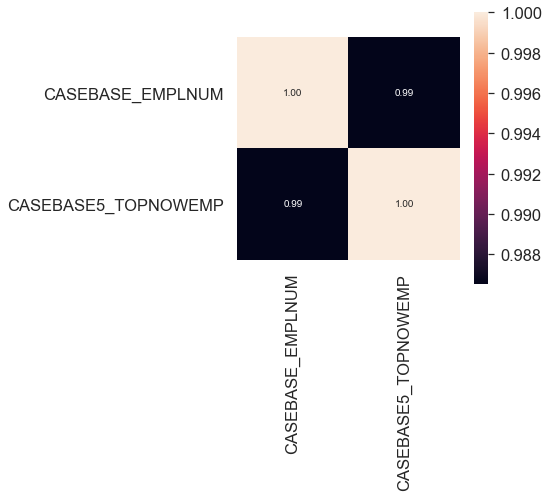

<Figure size 360x360 with 0 Axes>

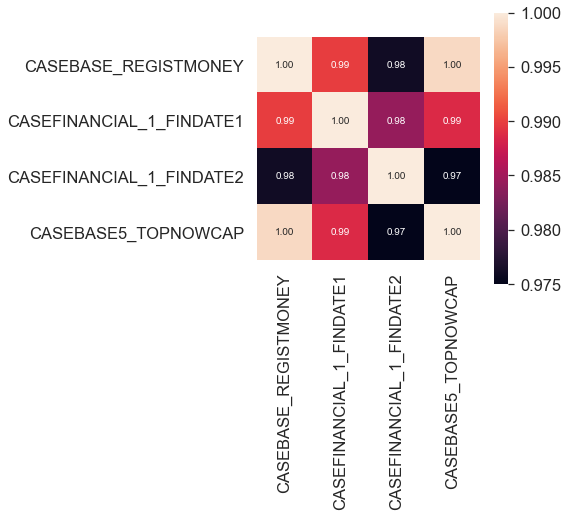

<Figure size 360x360 with 0 Axes>

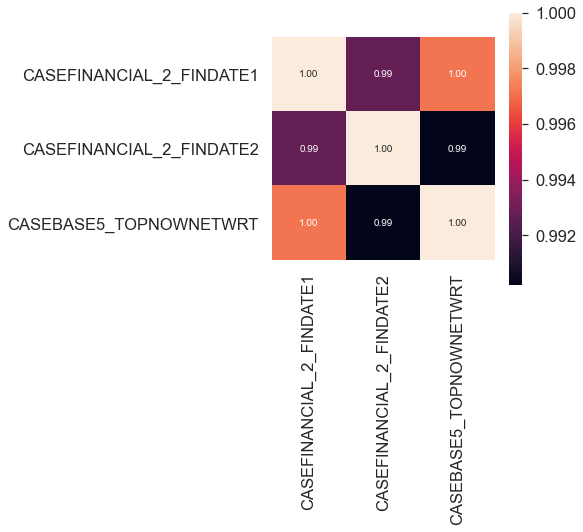

<Figure size 360x360 with 0 Axes>

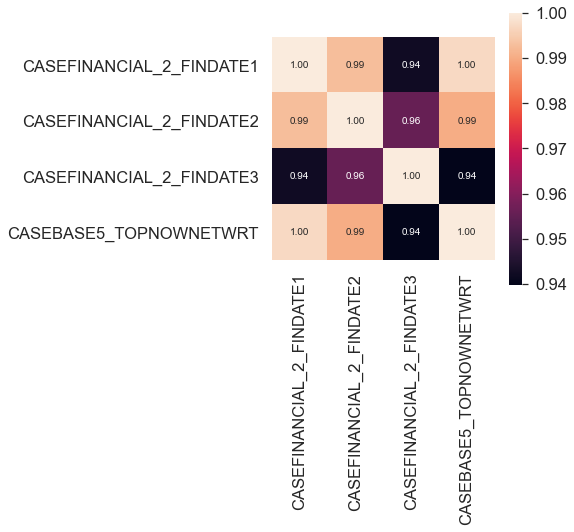

<Figure size 360x360 with 0 Axes>

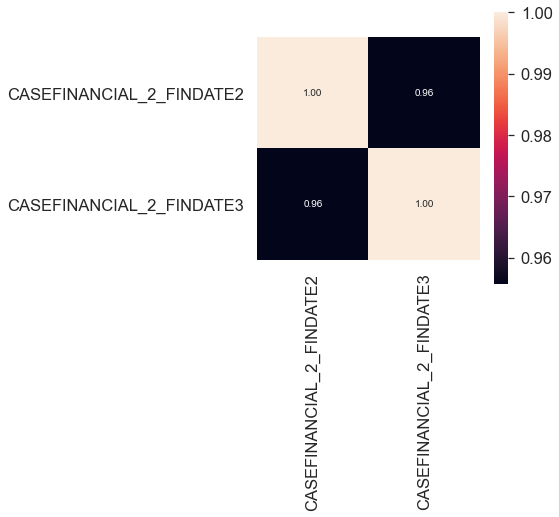

<Figure size 360x360 with 0 Axes>

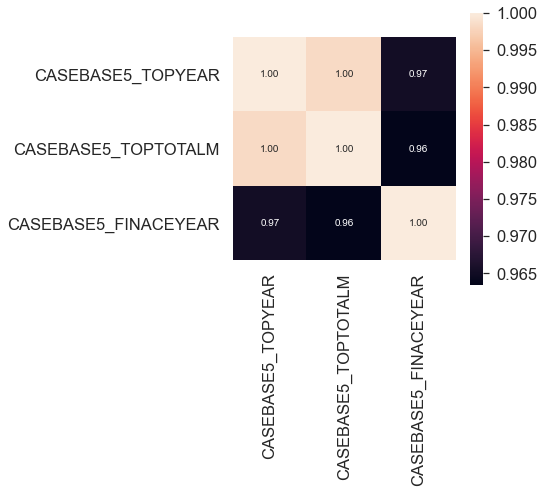

<Figure size 360x360 with 0 Axes>

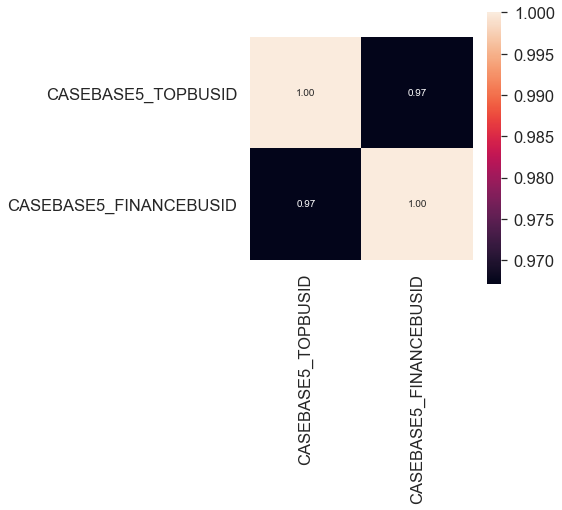

<Figure size 360x360 with 0 Axes>

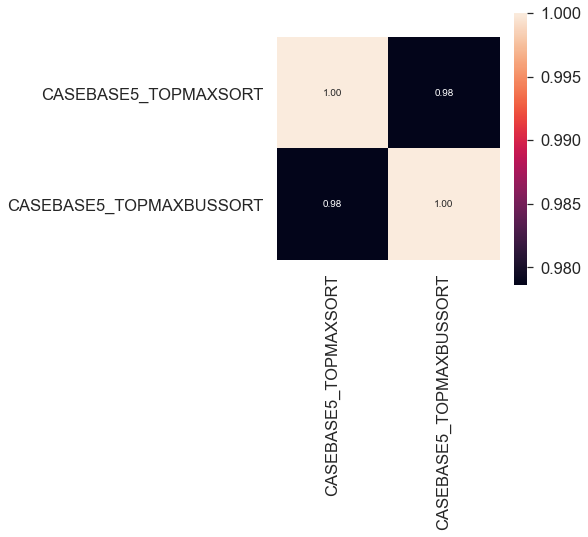

<Figure size 360x360 with 0 Axes>

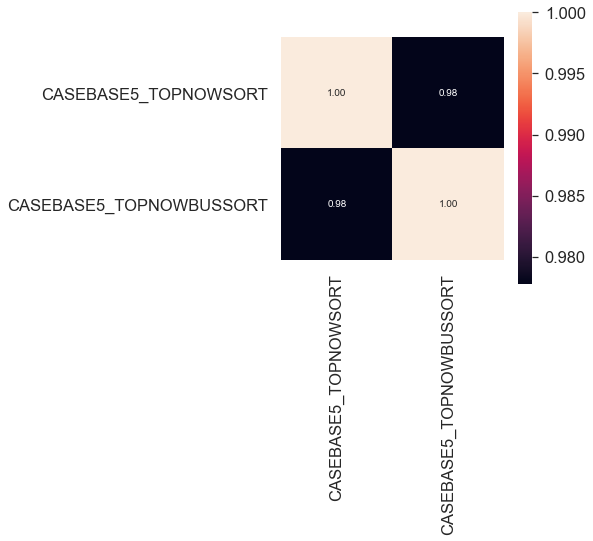

<Figure size 360x360 with 0 Axes>

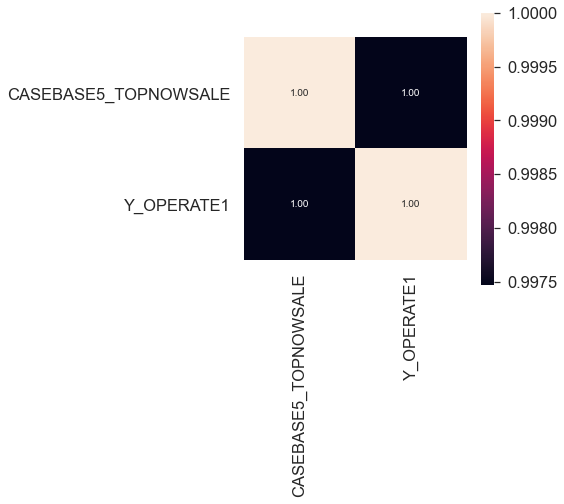

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
combine = set()
for i in corr_matrix.columns:
    temp_col = corr_matrix[corr_matrix[i]>Corr].index.to_list()
    if len(temp_col) <= 1 or (tuple(temp_col) in combine):
        continue
    else:
        
        cm = corr_matrix.loc[temp_col,temp_col].values
        plt.figure(figsize = (5,5))
        sns.set(font_scale=1.5)
        hm = sns.heatmap(cm,
                         cbar=True,
                         annot=True,
                         square=True,
                         fmt='.2f',
                         annot_kws={'size': 10},
                         yticklabels=temp_col,
                         xticklabels=temp_col)
        plt.show() 
        combine = combine | {tuple(temp_col)}

In [277]:
ColDropTable_corr, drop_corr= f_DropColPipe({Corr: lambda x : f_DropHighCorr(Data2,x,keep = y_col + keep)}, regex = True)
ColDropTable_corr
drop_corr



需刪除欄位共:13


,Symbol,ColumnName,Total,符合該條件數目,"符合該條件,需保留的",最終刪數目,刪除百分比
0,Corr > 0.95,"[CASEBASE_REGISTMONEY, CASEFINANCIAL_2_FINDATE...",168,13,0,13,0.077381


['CASEBASE_REGISTMONEY',
 'CASEFINANCIAL_2_FINDATE1',
 'CASEFINANCIAL_1_FINDATE2',
 'CASEFINANCIAL_2_FINDATE2',
 'CASEFINANCIAL_2_FINDATE3',
 'CASEBASE5_TOPTOTALM',
 'CASEBASE5_TOPMAXSORT',
 'CASEBASE5_TOPNOWSORT',
 'CASEBASE5_TOPNOWEMP',
 'CASEBASE5_TOPNOWSALE',
 'CASEBASE5_TOPNOWCAP',
 'CASEBASE5_FINACEYEAR',
 'CASEBASE5_FINANCEBUSID']

# 納入模型

In [278]:
Data2 = Data.drop(columns = drop_set + drop + drop_corr)
Data2.shape

(127747, 154)

In [279]:
Data2.head()

,,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_CCOUNTYOE,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STTT,CASEBASE1_STOTHER,CASEBASE1_STUFFOUT,CASEBASE1_CORGTYPE,CASEBASE1_ONEEXPLAIN,CASEBASE1_OPEOFFER_SEX,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSTT,CASEBASE2_PSOTHER,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_CPATYPE,CASEBASE2_COMPTYPE,CASEBASE2_NEWS,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_RPTTYPE,CASEBASE2_NOFINRPT,CASEBASE2_MAXCREDIT,CASEBASE2_PROCREDIT,CASEBASE2_NGETMSTOCK,CASEBASE3_FINCHK,CASEBASE3_NLIQUTRAN,CASEBASE3_OPERTRAN,CASEBASE3_CHFOLW1,CASEBASE3_CHFOLW1AMT,CASEBASE3_CHFOLW2,CASEBASE3_ANAYYEAR,CASEBASE3_LIQUVER,CASEBASE3_CASHVER,CASEFINANCIAL_1_FINDATE1,CASEFINANCIAL_8_FINDATE1,CASEFINANCIAL_10_FINDATE1,CASEFINANCIAL_11_FINDATE1,CASEFINANCIAL_10_FINDATE2,CASEFINANCIAL_11_FINDATE2,CASEFINANCIAL_1_FINDATE3,CASEFINANCIAL_10_FINDATE3,CASEFINANCIAL_11_FINDATE3,CASEINOUT_3_INOUT1,LAND_AREA_SUM,BUILD_AREA_SUM,CASEBASE5_TOPYEAR,CASEBASE5_TOPBUSNAME,CASEBASE5_ATTRIBUTE,CASEBASE5_ATTRIBNAME,CASEBASE5_TOPBUSSUMM,CASEBASE5_TOPBUSSUM,CASEBASE5_COMPBUSNO,CASEBASE5_TOPAVGEMP,CASEBASE5_TOPAVGSALE,CASEBASE5_TOPMINSORT,CASEBASE5_TOPMAXBUSSORT,CASEBASE5_TOPMINBUSSORT,CASEBASE5_TOPNOWBUSSORT,CASEBASE5_TOPMAXEMP,CASEBASE5_TOPMINEMP,CASEBASE5_TOPMAXSALE,CASEBASE5_TOPMINSALE,CASEBASE5_NOWSALEY,CASEBASE5_TOPMAXCAP,CASEBASE5_TOPMINCAP,CASEBASE5_FINACETYPE,CASEBASE5_FINANCEBUSNAME,CASEBASE5_MED02,CASEBASE5_MED06,CASEBASE5_MED09,CASEBASE5_MED10,CASEBASE5_MED23,CASEBASE5_MED24,CASEBASE5_MED25,CASEBASE5_MED26,CASEBASE5_MED41,CASEBASE5_MED42,CASEBASE5_MED43,CASEBASE5_MED45,CASEBASE5_MED50,CASEBASE5_MED51,CASEBASE5_MED61,CASEBASE5_MED62,CASEBASE5_MED64,CASEBASE5_MED65,CASEBASE5_MED67,CASEBASE5_MED71,CASEBASE5_MED72,CASEBASE5_MED22,CASEBASE5_MED21,CASEBASE5_MED44,CASEBASE5_REC_NO,CASEBASE5_MEMPLID,CASEBASE5_TOPAVGCAP,CASEBASE5_TOPNOWASST,CASEBASE5_TOPNOWNETWRT,CASEBASE5_TOPMAXASST,CASEBASE5_TOPMINASST,CASEBASE5_TOPAVGASST,CASEBASE5_TOPMAXNETWRT,CASEBASE5_TOPMINNETWRT,CASEBASE5_TOPAVGNETWRT,Flag_has_emplnum,Y_OPERATE1,Flag_CEMPL,CASE_Y,CASE_M,CASEBASE_BUSTYPE_4
CASE_ID,CASEBASE_CP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0801110001,C0460780,101,24.0,大型企業,製造業,B,1.0,桃園縣,2.0,5.0,1.0,1.0,2.0,9.0,0.0,10.0,1.0,1.0,0.0,1.0,100.0,100.0,100.0,14.86,11.30,2.0,3.0,7.0,0.0,0.0,100.0,1.0,股票上櫃,1.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0,N,Y,Y,1.0,Y,N,N,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.0,0.55,0.0,82671.0,0.0,2006.0,1.0,1.0,626578.0,2006.0,46187.0,20614.0,84964.0,75934.0,324104.0,98327.0,77942.0,1.0,5773.00,6073.00,2008.0,被動電子元件業,M,製造業,2746.0,63.0,37.0,288.0,2041684.0,4921.0,156.0,2703.0,1513.0,2586.0,15.0,13165645.0,125298.0,2006.0,24382213.0,50000.0,1.0,其他電子零組件業,12.39,35.57,535.19,55.14,6.48,10.61,6.72,18.54,9.32,3.42,6.21,0.86,5.36,68.0,186.26,146.38,37.22,108.44,14.02,12.77,4.94,0.0,0.0,0.0,160.0,546.0,1236431.0,1811326.0,852689.0,49603313.0,109807.0,3206501.0,31946432.0,41045.0,2167368.0,1,805638.0,1,8,1,1299
0801110002,C0180073,50,23.0,中型企業,製造業,B,1.0,台中市,2.0,0.0,1.0,1.0,1.0,9.0,0.0,10.0,2.0,1.0,3.0,0.0,100.0,100.0,100.0,-32.18,-78.71,2.0,3.0,1.0,100.0,

<AxesSubplot:>

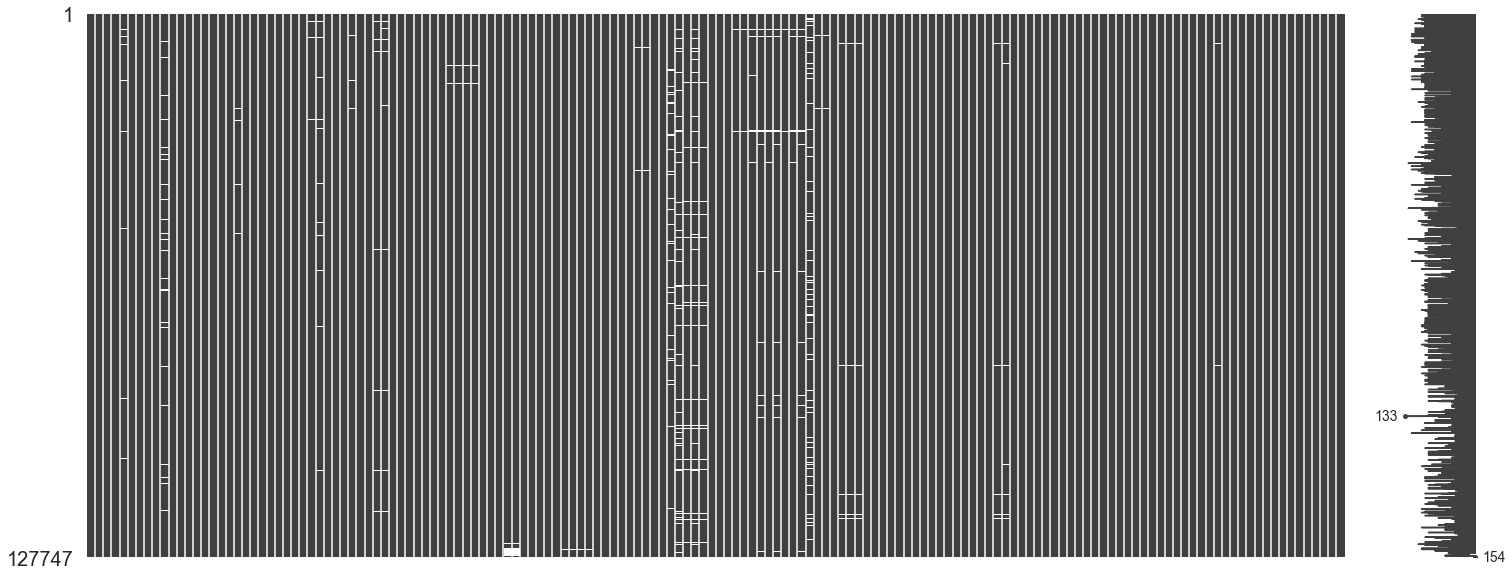

In [280]:
ms.matrix(Data2)

# 資料視覺化

In [281]:
from Eric_utilites.Eric_DataVisualization import *
%run Eric_utilites/Eric_DataVisualization.py

CCOMPTYPE_order = ['小型企業', '中小型企業', '中型企業','大型企業','超大型企業',
                   '境外企業','政府機構','政府大型機構','大型醫院','財團法人',
                   '社團法人','辦事處','不詳']



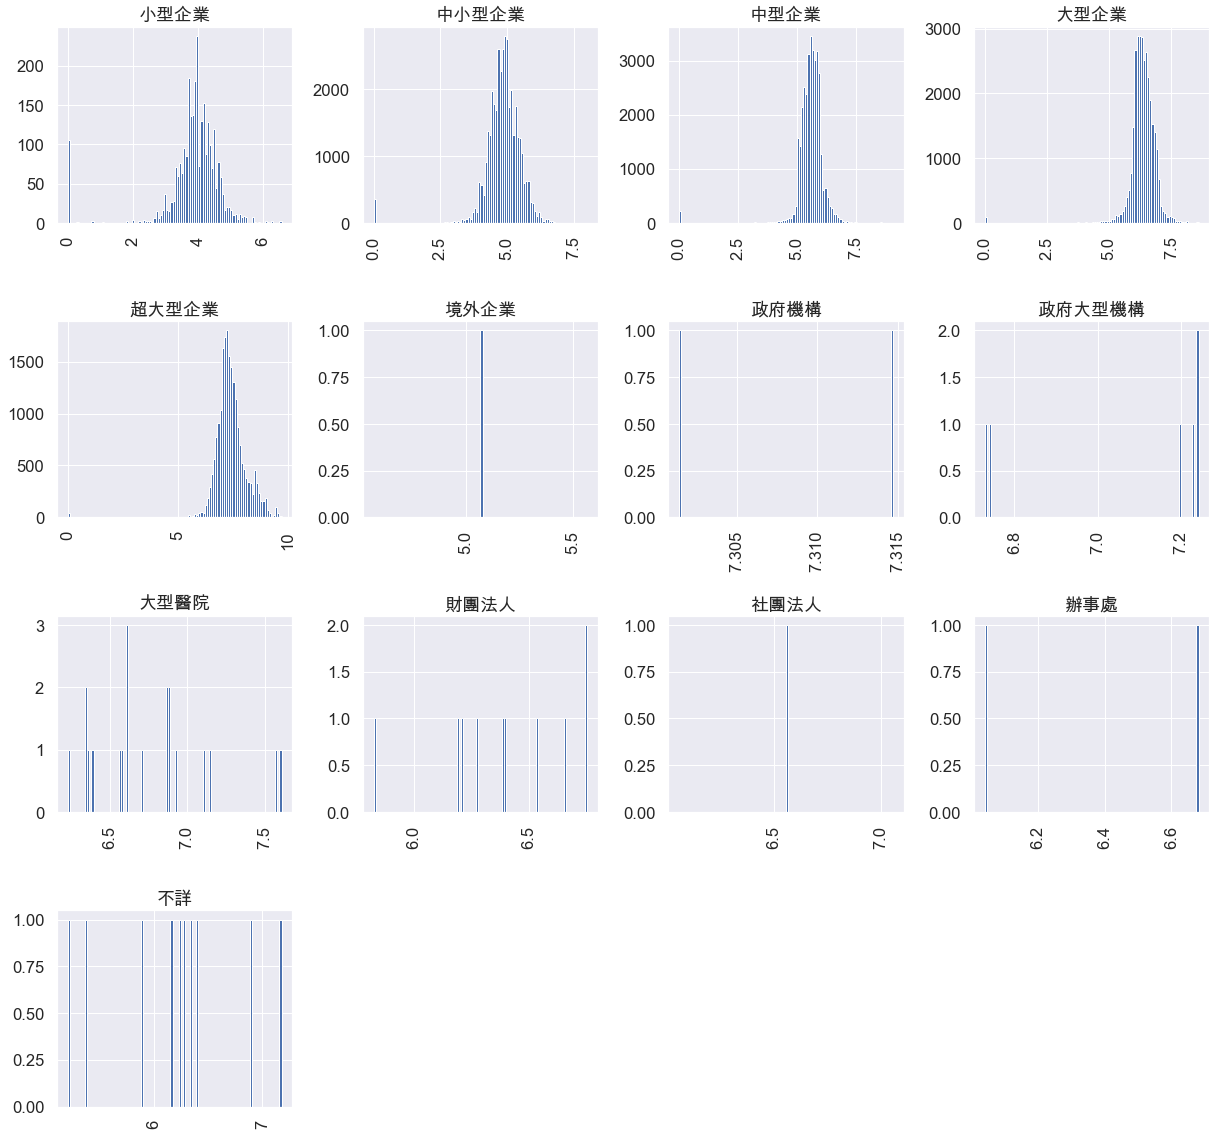

1

In [282]:
import matplotlib.pyplot as plt 

mean = Data2['Y_OPERATE1'].mean()
std = Data2['Y_OPERATE1'].std()

func_log = lambda x : np.log10(abs(x) + 1)
func_norm = lambda x : (x-mean)/std

f_GroupHist(Data2,'CASEBASE_CCOMPTYPE','Y_OPERATE1',func = func_log, order = CCOMPTYPE_order,bins = 100)


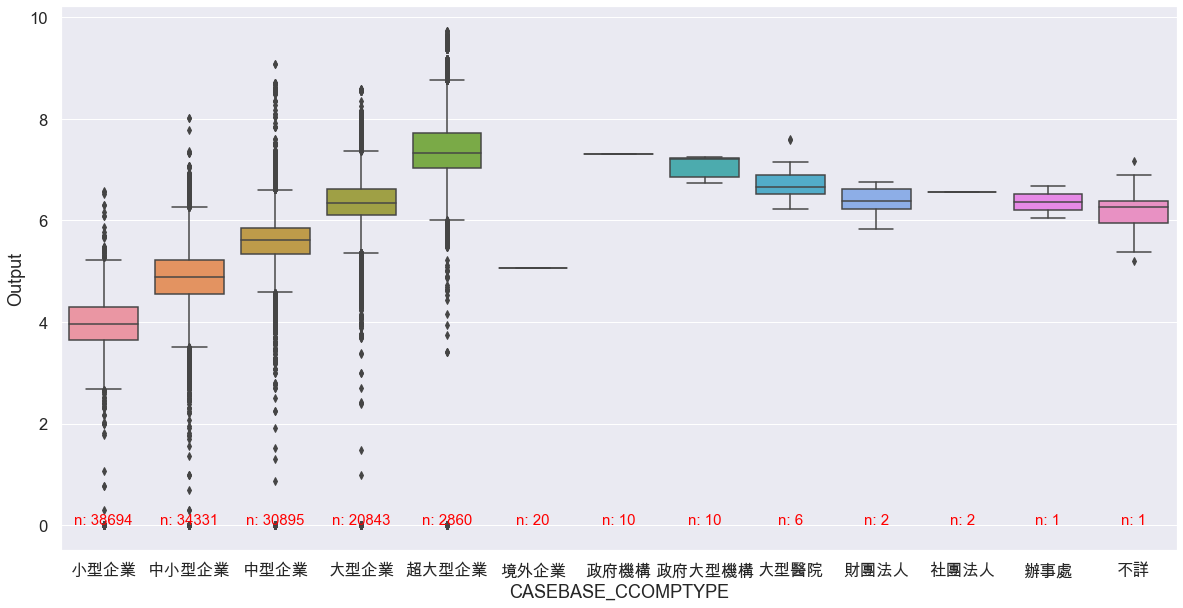

1

In [283]:

f_Boxplot(Data, 'CASEBASE_CCOMPTYPE', 'Y_OPERATE1',func = func_log, order = CCOMPTYPE_order)

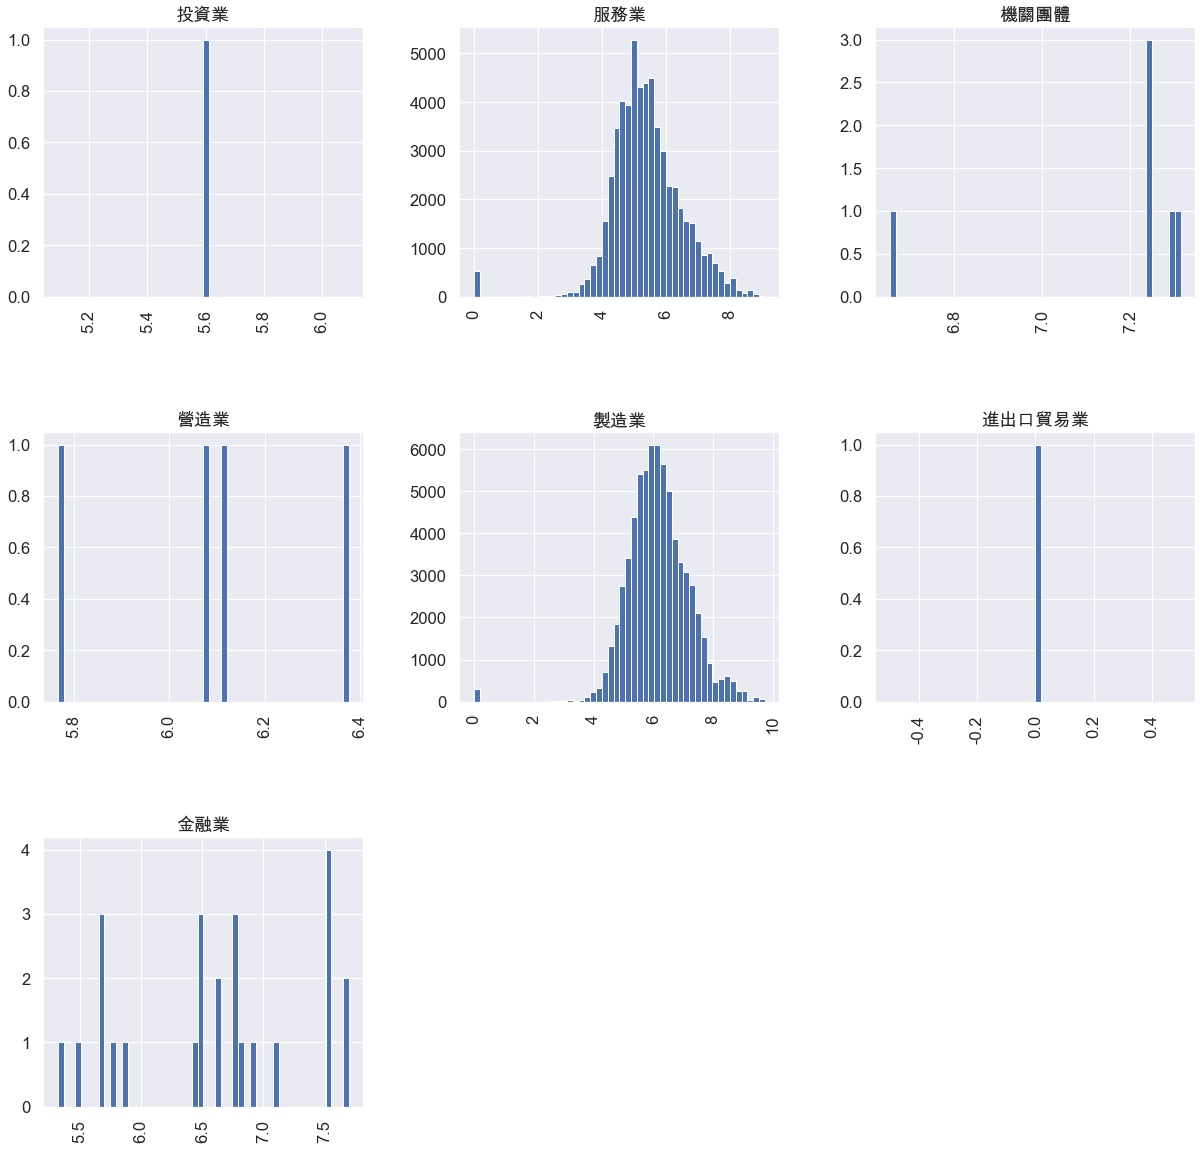

1

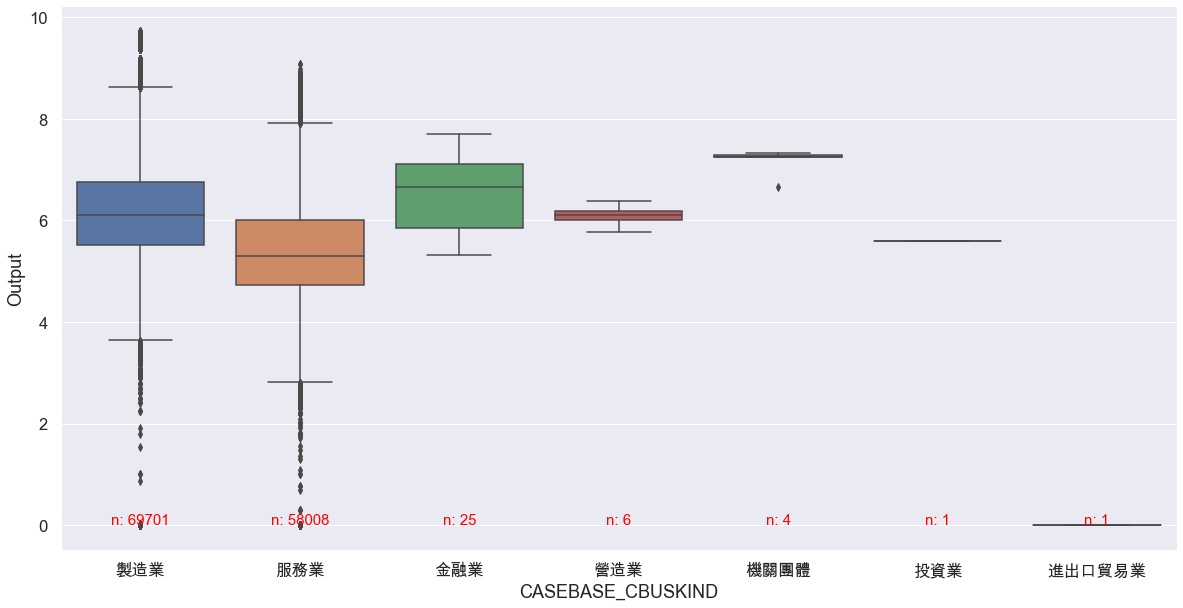

1

In [284]:
f_GroupHist(Data, 'CASEBASE_CBUSKIND', 'Y_OPERATE1',func = func_log, order = None)
f_Boxplot(Data, 'CASEBASE_CBUSKIND', 'Y_OPERATE1',func = func_log, order = None)

In [285]:
Data2.head()

,,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_CCOUNTYOE,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STTT,CASEBASE1_STOTHER,CASEBASE1_STUFFOUT,CASEBASE1_CORGTYPE,CASEBASE1_ONEEXPLAIN,CASEBASE1_OPEOFFER_SEX,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSTT,CASEBASE2_PSOTHER,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_CPATYPE,CASEBASE2_COMPTYPE,CASEBASE2_NEWS,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_RPTTYPE,CASEBASE2_NOFINRPT,CASEBASE2_MAXCREDIT,CASEBASE2_PROCREDIT,CASEBASE2_NGETMSTOCK,CASEBASE3_FINCHK,CASEBASE3_NLIQUTRAN,CASEBASE3_OPERTRAN,CASEBASE3_CHFOLW1,CASEBASE3_CHFOLW1AMT,CASEBASE3_CHFOLW2,CASEBASE3_ANAYYEAR,CASEBASE3_LIQUVER,CASEBASE3_CASHVER,CASEFINANCIAL_1_FINDATE1,CASEFINANCIAL_8_FINDATE1,CASEFINANCIAL_10_FINDATE1,CASEFINANCIAL_11_FINDATE1,CASEFINANCIAL_10_FINDATE2,CASEFINANCIAL_11_FINDATE2,CASEFINANCIAL_1_FINDATE3,CASEFINANCIAL_10_FINDATE3,CASEFINANCIAL_11_FINDATE3,CASEINOUT_3_INOUT1,LAND_AREA_SUM,BUILD_AREA_SUM,CASEBASE5_TOPYEAR,CASEBASE5_TOPBUSNAME,CASEBASE5_ATTRIBUTE,CASEBASE5_ATTRIBNAME,CASEBASE5_TOPBUSSUMM,CASEBASE5_TOPBUSSUM,CASEBASE5_COMPBUSNO,CASEBASE5_TOPAVGEMP,CASEBASE5_TOPAVGSALE,CASEBASE5_TOPMINSORT,CASEBASE5_TOPMAXBUSSORT,CASEBASE5_TOPMINBUSSORT,CASEBASE5_TOPNOWBUSSORT,CASEBASE5_TOPMAXEMP,CASEBASE5_TOPMINEMP,CASEBASE5_TOPMAXSALE,CASEBASE5_TOPMINSALE,CASEBASE5_NOWSALEY,CASEBASE5_TOPMAXCAP,CASEBASE5_TOPMINCAP,CASEBASE5_FINACETYPE,CASEBASE5_FINANCEBUSNAME,CASEBASE5_MED02,CASEBASE5_MED06,CASEBASE5_MED09,CASEBASE5_MED10,CASEBASE5_MED23,CASEBASE5_MED24,CASEBASE5_MED25,CASEBASE5_MED26,CASEBASE5_MED41,CASEBASE5_MED42,CASEBASE5_MED43,CASEBASE5_MED45,CASEBASE5_MED50,CASEBASE5_MED51,CASEBASE5_MED61,CASEBASE5_MED62,CASEBASE5_MED64,CASEBASE5_MED65,CASEBASE5_MED67,CASEBASE5_MED71,CASEBASE5_MED72,CASEBASE5_MED22,CASEBASE5_MED21,CASEBASE5_MED44,CASEBASE5_REC_NO,CASEBASE5_MEMPLID,CASEBASE5_TOPAVGCAP,CASEBASE5_TOPNOWASST,CASEBASE5_TOPNOWNETWRT,CASEBASE5_TOPMAXASST,CASEBASE5_TOPMINASST,CASEBASE5_TOPAVGASST,CASEBASE5_TOPMAXNETWRT,CASEBASE5_TOPMINNETWRT,CASEBASE5_TOPAVGNETWRT,Flag_has_emplnum,Y_OPERATE1,Flag_CEMPL,CASE_Y,CASE_M,CASEBASE_BUSTYPE_4
CASE_ID,CASEBASE_CP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0801110001,C0460780,101,24.0,大型企業,製造業,B,1.0,桃園縣,2.0,5.0,1.0,1.0,2.0,9.0,0.0,10.0,1.0,1.0,0.0,1.0,100.0,100.0,100.0,14.86,11.30,2.0,3.0,7.0,0.0,0.0,100.0,1.0,股票上櫃,1.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0,N,Y,Y,1.0,Y,N,N,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.0,0.55,0.0,82671.0,0.0,2006.0,1.0,1.0,626578.0,2006.0,46187.0,20614.0,84964.0,75934.0,324104.0,98327.0,77942.0,1.0,5773.00,6073.00,2008.0,被動電子元件業,M,製造業,2746.0,63.0,37.0,288.0,2041684.0,4921.0,156.0,2703.0,1513.0,2586.0,15.0,13165645.0,125298.0,2006.0,24382213.0,50000.0,1.0,其他電子零組件業,12.39,35.57,535.19,55.14,6.48,10.61,6.72,18.54,9.32,3.42,6.21,0.86,5.36,68.0,186.26,146.38,37.22,108.44,14.02,12.77,4.94,0.0,0.0,0.0,160.0,546.0,1236431.0,1811326.0,852689.0,49603313.0,109807.0,3206501.0,31946432.0,41045.0,2167368.0,1,805638.0,1,8,1,1299
0801110002,C0180073,50,23.0,中型企業,製造業,B,1.0,台中市,2.0,0.0,1.0,1.0,1.0,9.0,0.0,10.0,2.0,1.0,3.0,0.0,100.0,100.0,100.0,-32.18,-78.71,2.0,3.0,1.0,100.0,

In [286]:
Data2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 127747 entries, ('0801110001', 'C0460780') to ('1905990029', 'C941005F')
Data columns (total 154 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   CASEBASE_EMPLNUM           int64   
 1   CASEBASE_BUILDATE          float64 
 2   CASEBASE_CCOMPTYPE         category
 3   CASEBASE_CBUSKIND          object  
 4   CASEBASE_RANK              object  
 5   CASEBASE_LEGAL             float64 
 6   CASEBASE_CCOUNTYOE         object  
 7   CASEBASE1_FACTORY          float64 
 8   CASEBASE1_CONGLOME         float64 
 9   CASEBASE1_HISTYPE          float64 
 10  CASEBASE1_HISTORY          float64 
 11  CASEBASE1_SALEITEM         float64 
 12  CASEBASE1_CAPTIAL          float64 
 13  CASEBASE1_STOCKER          float64 
 14  CASEBASE1_STOCKH           float64 
 15  CASEBASE1_OPERATE          float64 
 16  CASEBASE1_MPLANT           float64 
 17  CASEBASE1_PROCPLANT        float64 
 18  CASEBASE1_PAWN    

# 資料標記

In [287]:
# Data2_col_object = Data2.select_dtypes(object).columns
# col_mapping = {}

# for i in Data2_col_object:
#     if Data2.select_dtypes(object)[i].str.contains(r'[a-zA-Z0-9]+').sum() == 0:
#         Data2[i+'_num'] = Data2[i].astype('category').cat.codes.astype('object')
#         col_mapping.update( {i:dict( enumerate(Data2[i].astype('category').cat.categories ) )})
#         Data2 = Data2.drop(columns = i)
#     else:
#         print(i)
#         #print("{} has error {}".format(i,e))



In [288]:
Data2.head()



,,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_CCOUNTYOE,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STTT,CASEBASE1_STOTHER,CASEBASE1_STUFFOUT,CASEBASE1_CORGTYPE,CASEBASE1_ONEEXPLAIN,CASEBASE1_OPEOFFER_SEX,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSTT,CASEBASE2_PSOTHER,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_CPATYPE,CASEBASE2_COMPTYPE,CASEBASE2_NEWS,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_RPTTYPE,CASEBASE2_NOFINRPT,CASEBASE2_MAXCREDIT,CASEBASE2_PROCREDIT,CASEBASE2_NGETMSTOCK,CASEBASE3_FINCHK,CASEBASE3_NLIQUTRAN,CASEBASE3_OPERTRAN,CASEBASE3_CHFOLW1,CASEBASE3_CHFOLW1AMT,CASEBASE3_CHFOLW2,CASEBASE3_ANAYYEAR,CASEBASE3_LIQUVER,CASEBASE3_CASHVER,CASEFINANCIAL_1_FINDATE1,CASEFINANCIAL_8_FINDATE1,CASEFINANCIAL_10_FINDATE1,CASEFINANCIAL_11_FINDATE1,CASEFINANCIAL_10_FINDATE2,CASEFINANCIAL_11_FINDATE2,CASEFINANCIAL_1_FINDATE3,CASEFINANCIAL_10_FINDATE3,CASEFINANCIAL_11_FINDATE3,CASEINOUT_3_INOUT1,LAND_AREA_SUM,BUILD_AREA_SUM,CASEBASE5_TOPYEAR,CASEBASE5_TOPBUSNAME,CASEBASE5_ATTRIBUTE,CASEBASE5_ATTRIBNAME,CASEBASE5_TOPBUSSUMM,CASEBASE5_TOPBUSSUM,CASEBASE5_COMPBUSNO,CASEBASE5_TOPAVGEMP,CASEBASE5_TOPAVGSALE,CASEBASE5_TOPMINSORT,CASEBASE5_TOPMAXBUSSORT,CASEBASE5_TOPMINBUSSORT,CASEBASE5_TOPNOWBUSSORT,CASEBASE5_TOPMAXEMP,CASEBASE5_TOPMINEMP,CASEBASE5_TOPMAXSALE,CASEBASE5_TOPMINSALE,CASEBASE5_NOWSALEY,CASEBASE5_TOPMAXCAP,CASEBASE5_TOPMINCAP,CASEBASE5_FINACETYPE,CASEBASE5_FINANCEBUSNAME,CASEBASE5_MED02,CASEBASE5_MED06,CASEBASE5_MED09,CASEBASE5_MED10,CASEBASE5_MED23,CASEBASE5_MED24,CASEBASE5_MED25,CASEBASE5_MED26,CASEBASE5_MED41,CASEBASE5_MED42,CASEBASE5_MED43,CASEBASE5_MED45,CASEBASE5_MED50,CASEBASE5_MED51,CASEBASE5_MED61,CASEBASE5_MED62,CASEBASE5_MED64,CASEBASE5_MED65,CASEBASE5_MED67,CASEBASE5_MED71,CASEBASE5_MED72,CASEBASE5_MED22,CASEBASE5_MED21,CASEBASE5_MED44,CASEBASE5_REC_NO,CASEBASE5_MEMPLID,CASEBASE5_TOPAVGCAP,CASEBASE5_TOPNOWASST,CASEBASE5_TOPNOWNETWRT,CASEBASE5_TOPMAXASST,CASEBASE5_TOPMINASST,CASEBASE5_TOPAVGASST,CASEBASE5_TOPMAXNETWRT,CASEBASE5_TOPMINNETWRT,CASEBASE5_TOPAVGNETWRT,Flag_has_emplnum,Y_OPERATE1,Flag_CEMPL,CASE_Y,CASE_M,CASEBASE_BUSTYPE_4
CASE_ID,CASEBASE_CP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0801110001,C0460780,101,24.0,大型企業,製造業,B,1.0,桃園縣,2.0,5.0,1.0,1.0,2.0,9.0,0.0,10.0,1.0,1.0,0.0,1.0,100.0,100.0,100.0,14.86,11.30,2.0,3.0,7.0,0.0,0.0,100.0,1.0,股票上櫃,1.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0,N,Y,Y,1.0,Y,N,N,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.0,0.55,0.0,82671.0,0.0,2006.0,1.0,1.0,626578.0,2006.0,46187.0,20614.0,84964.0,75934.0,324104.0,98327.0,77942.0,1.0,5773.00,6073.00,2008.0,被動電子元件業,M,製造業,2746.0,63.0,37.0,288.0,2041684.0,4921.0,156.0,2703.0,1513.0,2586.0,15.0,13165645.0,125298.0,2006.0,24382213.0,50000.0,1.0,其他電子零組件業,12.39,35.57,535.19,55.14,6.48,10.61,6.72,18.54,9.32,3.42,6.21,0.86,5.36,68.0,186.26,146.38,37.22,108.44,14.02,12.77,4.94,0.0,0.0,0.0,160.0,546.0,1236431.0,1811326.0,852689.0,49603313.0,109807.0,3206501.0,31946432.0,41045.0,2167368.0,1,805638.0,1,8,1,1299
0801110002,C0180073,50,23.0,中型企業,製造業,B,1.0,台中市,2.0,0.0,1.0,1.0,1.0,9.0,0.0,10.0,2.0,1.0,3.0,0.0,100.0,100.0,100.0,-32.18,-78.71,2.0,3.0,1.0,100.0,

In [289]:
Data2.to_hdf('Data/Data_final.h5',key='with_all',format='t')
#col_mapping.to_hdf('Outputfolder/Data.h5',key='mapping')

# 保留「完整資料」，暫時不考慮NA 數值

In [290]:
Data_final = Data2.dropna(axis = 0, how='any')
#Data_final = Data2

Data_final = Data_final.loc[:,y_col + [i for i in Data_final.columns if i not in y_col]]

Data_final.head()
Data_final.shape

,,Y_OPERATE1,CASEBASE1_GPY1,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_CCOUNTYOE,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STTT,CASEBASE1_STOTHER,CASEBASE1_STUFFOUT,CASEBASE1_CORGTYPE,CASEBASE1_ONEEXPLAIN,CASEBASE1_OPEOFFER_SEX,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSTT,CASEBASE2_PSOTHER,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_CPATYPE,CASEBASE2_COMPTYPE,CASEBASE2_NEWS,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_RPTTYPE,CASEBASE2_NOFINRPT,CASEBASE2_MAXCREDIT,CASEBASE2_PROCREDIT,CASEBASE2_NGETMSTOCK,CASEBASE3_FINCHK,CASEBASE3_NLIQUTRAN,CASEBASE3_OPERTRAN,CASEBASE3_CHFOLW1,CASEBASE3_CHFOLW1AMT,CASEBASE3_CHFOLW2,CASEBASE3_ANAYYEAR,CASEBASE3_LIQUVER,CASEBASE3_CASHVER,CASEFINANCIAL_1_FINDATE1,CASEFINANCIAL_8_FINDATE1,CASEFINANCIAL_10_FINDATE1,CASEFINANCIAL_11_FINDATE1,CASEFINANCIAL_10_FINDATE2,CASEFINANCIAL_11_FINDATE2,CASEFINANCIAL_1_FINDATE3,CASEFINANCIAL_10_FINDATE3,CASEFINANCIAL_11_FINDATE3,CASEINOUT_3_INOUT1,LAND_AREA_SUM,BUILD_AREA_SUM,CASEBASE5_TOPYEAR,CASEBASE5_TOPBUSNAME,CASEBASE5_ATTRIBUTE,CASEBASE5_ATTRIBNAME,CASEBASE5_TOPBUSSUMM,CASEBASE5_TOPBUSSUM,CASEBASE5_COMPBUSNO,CASEBASE5_TOPAVGEMP,CASEBASE5_TOPAVGSALE,CASEBASE5_TOPMINSORT,CASEBASE5_TOPMAXBUSSORT,CASEBASE5_TOPMINBUSSORT,CASEBASE5_TOPNOWBUSSORT,CASEBASE5_TOPMAXEMP,CASEBASE5_TOPMINEMP,CASEBASE5_TOPMAXSALE,CASEBASE5_TOPMINSALE,CASEBASE5_NOWSALEY,CASEBASE5_TOPMAXCAP,CASEBASE5_TOPMINCAP,CASEBASE5_FINACETYPE,CASEBASE5_FINANCEBUSNAME,CASEBASE5_MED02,CASEBASE5_MED06,CASEBASE5_MED09,CASEBASE5_MED10,CASEBASE5_MED23,CASEBASE5_MED24,CASEBASE5_MED25,CASEBASE5_MED26,CASEBASE5_MED41,CASEBASE5_MED42,CASEBASE5_MED43,CASEBASE5_MED45,CASEBASE5_MED50,CASEBASE5_MED51,CASEBASE5_MED61,CASEBASE5_MED62,CASEBASE5_MED64,CASEBASE5_MED65,CASEBASE5_MED67,CASEBASE5_MED71,CASEBASE5_MED72,CASEBASE5_MED22,CASEBASE5_MED21,CASEBASE5_MED44,CASEBASE5_REC_NO,CASEBASE5_MEMPLID,CASEBASE5_TOPAVGCAP,CASEBASE5_TOPNOWASST,CASEBASE5_TOPNOWNETWRT,CASEBASE5_TOPMAXASST,CASEBASE5_TOPMINASST,CASEBASE5_TOPAVGASST,CASEBASE5_TOPMAXNETWRT,CASEBASE5_TOPMINNETWRT,CASEBASE5_TOPAVGNETWRT,Flag_has_emplnum,Flag_CEMPL,CASE_Y,CASE_M,CASEBASE_BUSTYPE_4
CASE_ID,CASEBASE_CP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0801110001,C0460780,805638.0,14.86,101,24.0,大型企業,製造業,B,1.0,桃園縣,2.0,5.0,1.0,1.0,2.0,9.0,0.0,10.0,1.0,1.0,0.0,1.0,100.0,100.0,100.0,11.30,2.0,3.0,7.0,0.0,0.0,100.0,1.0,股票上櫃,1.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0,N,Y,Y,1.0,Y,N,N,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.0,0.0,N,Y,N,0.0,9.0,Z,2.0,N,N,N,0.0,Y,0.00,0.55,0.0,82671.0,0.0,2006.0,1.0,1.0,626578.0,2006.0,46187.0,20614.0,84964.0,75934.0,324104.0,98327.0,77942.0,1.00,5773.0,6073.00,2008.0,被動電子元件業,M,製造業,2746.0,63.0,37.0,288.0,2041684.0,4921.0,156.0,2703.0,1513.0,2586.0,15.0,13165645.0,125298.0,2006.0,24382213.0,50000.0,1.0,其他電子零組件業,12.39,35.57,535.19,55.14,6.48,10.61,6.72,18.54,9.32,3.42,6.21,0.86,5.36,68.0,186.26,146.38,37.22,108.44,14.02,12.77,4.94,0.0,0.0,0.0,160.0,546.0,1236431.0,1811326.0,852689.0,49603313.0,109807.0,3206501.0,31946432.0,41045.0,2167368.0,1,1,8,1,1299
0801110004,C95B0268,2736536.0,45.38,759,30.0,大型企業,製造業,B,1.0,台北市,3.0,6.0,1.0,1.0,1.0,8.0,0.0,13.0,1.0,2.0,6.0,1.0,100.0,100.0,100.0,7.08,2.0,4.0,6

(81830, 154)

# Y_OPERATE1 極端值

count    8.183000e+04
mean     9.849171e+06
std      5.460210e+07
min     -9.000000e+00
25%      1.400000e+05
50%      5.560000e+05
75%      2.641601e+06
max      1.340164e+09
Name: Y_OPERATE1, dtype: float64

0.0       32
1.0        6
2.0       35
3.0      969
4.0    14971
5.0    32900
6.0    23158
7.0     8293
8.0     1409
9.0       57
Name: Y_OPERATE1, dtype: int64

(array([3.2000e+01, 3.0000e+00, 1.4000e+01, 3.1200e+02, 6.2620e+03,
        2.4543e+04, 2.9413e+04, 1.5357e+04, 4.9400e+03, 9.5400e+02]),
 array([0.        , 0.91271579, 1.82543158, 2.73814737, 3.65086315,
        4.56357894, 5.47629473, 6.38901052, 7.30172631, 8.2144421 ,
        9.12715789]),
 <BarContainer object of 10 artists>)

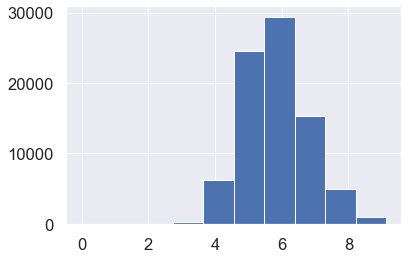

In [291]:
from sklearn.neighbors import LocalOutlierFactor
Data_final['Y_OPERATE1'] .describe()
np.floor(np.log10(abs(Data_final['Y_OPERATE1'] + 1))).value_counts().sort_index()
plt.hist(np.log10(abs(Data_final['Y_OPERATE1'] + 1)))


(array([7.3819e+04, 3.3090e+03, 1.3770e+03, 7.8200e+02, 4.7100e+02,
        3.6100e+02, 1.9600e+02, 1.5800e+02, 1.0400e+02, 9.7000e+01,
        9.3000e+01, 5.7000e+01, 7.9000e+01, 3.6000e+01, 4.6000e+01,
        5.8000e+01, 2.0000e+00, 4.2000e+01, 9.0000e+00, 1.1000e+01,
        2.3000e+01, 2.9000e+01, 3.7000e+01, 4.5000e+01, 5.3000e+01,
        1.7000e+01, 5.4000e+01, 3.9000e+01, 1.1000e+01, 1.2000e+01,
        2.2000e+01, 7.9000e+01, 1.0000e+00, 8.0000e+00, 4.0000e+00,
        6.4000e+01, 3.0000e+01, 1.0000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8000e+01,
        3.0000e+00, 6.0000e+00, 1.8000e+01, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 9.0000e+00, 1.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 1.4000e+01, 8.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.2000e+01, 0.0000e+00, 8.0000e+00,
        2.0000e+00, 0.0000e+00, 1.1000e+01, 0.00

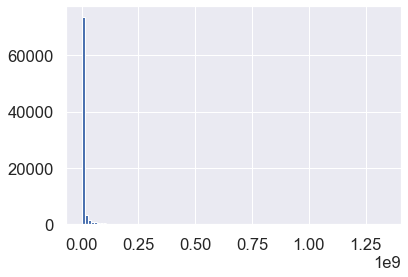

In [292]:
plt.hist(Data_final['Y_OPERATE1'],bins=100)

In [293]:
Q1 =  Data_final['Y_OPERATE1'].quantile(0.25)
Q3 = Data_final['Y_OPERATE1'] .quantile(0.75)
IQR = Q3 - Q1


print('IQR         : {:>12.2f}'.format(IQR))
print('Q1-1.5* IQR : {:>12.2f}'.format(Q1 - 1.5 * IQR))
print('Q1          : {:>12.2f}'.format(Q1))
print('Q3          : {:>12.2f}'.format(Q3))
print('Q3+1.5* IQR : {:>12.2f}'.format(Q3 + 1.5 * IQR))

IQR         :   2501601.00
Q1-1.5* IQR :  -3612401.50
Q1          :    140000.00
Q3          :   2641601.00
Q3+1.5* IQR :   6394002.50


In [294]:
# ## 用 Q1 - 1.5 * IQR,  Q3 + 1.5*IQR
# Y_no_outliar = Data_final['Y_OPERATE1'][~((Data_final['Y_OPERATE1'] < (Q1 - 1.5 * IQR)) |(Data_final['Y_OPERATE1'] > (Q3 + 1.5 * IQR)))]


# idx_iqr = Y_no_outliar.index

# ## 


# idx_all = Data_final.index
# ## 刪除的資料集
# idx_delete = list(set(idx_all)  -  set(idx_iqr))


# print('Raw        : {:>7}'.format(len(idx_all)))
# print('Outliar    : {:>7}'.format(len(idx_delete)))
# print('After Drop : {:>7}'.format(len(idx_iqr)))




# Y_is_outliar = Data.loc[idx_delete,:]



In [295]:
# Y_is_outliar.to_csv('Y_is_outliar.csv')



# 納入模行資料筆數

In [ ]:
Data_M =  Data_final
Data_M.shape




y_M = Data_M[y_col[0]]
X_M = Data_M.drop(columns=y_col)

In [297]:
corr_matrix = Data_M.corr()

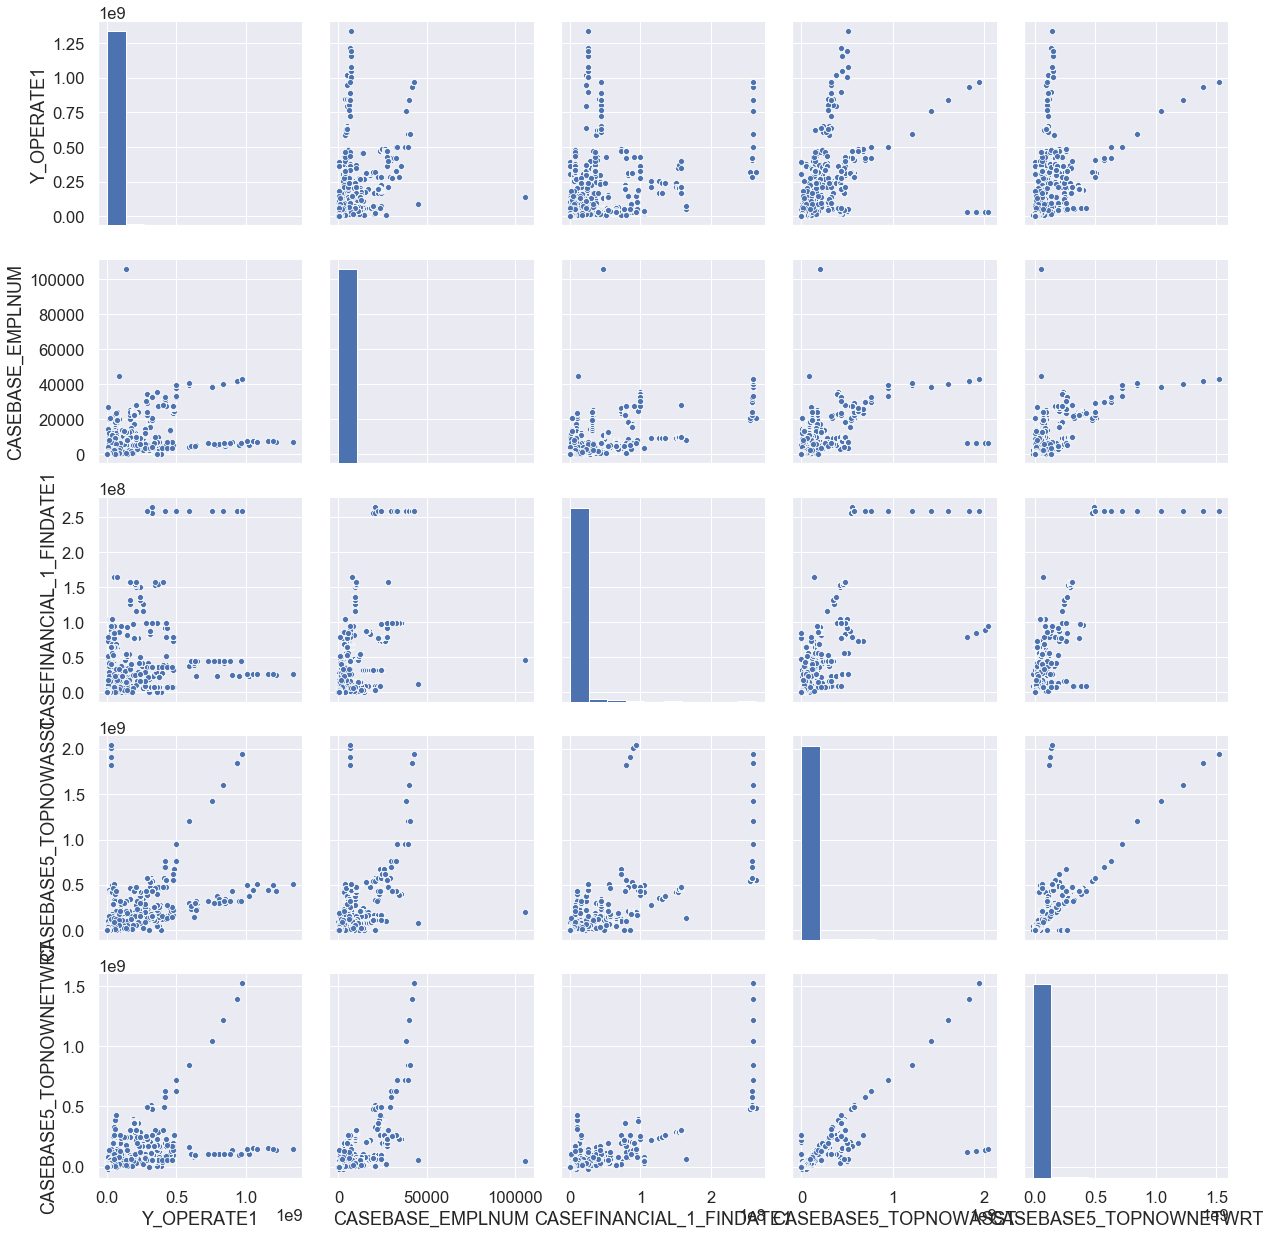

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = corr_matrix[corr_matrix['Y_OPERATE1'].abs() > 0.6]['Y_OPERATE1'].index.to_list()
sns.pairplot(Data_final[cols], height=3.5)
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

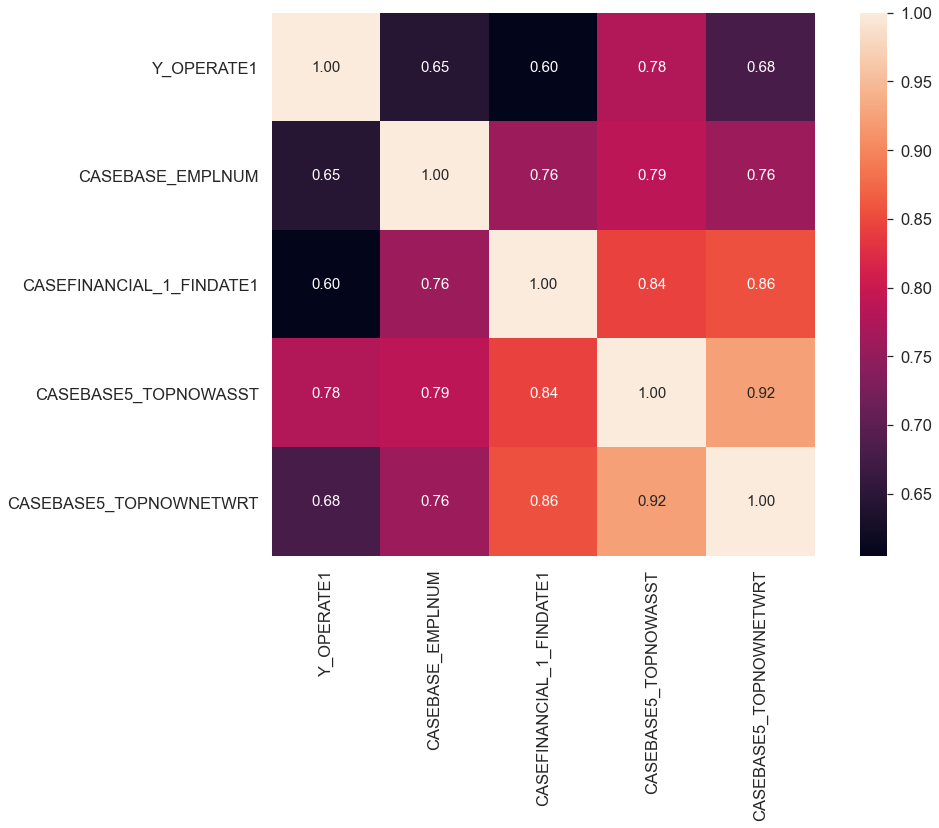

In [302]:
import numpy as np
cm = np.corrcoef(Data_final[cols].values.T)
plt.figure(figsize = (16,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

# BY 年度的案件數目

In [303]:
X_date_count = pd.DataFrame(X_M.groupby('20'+X_M.index.get_level_values('CASE_ID').str[0:2]).size())


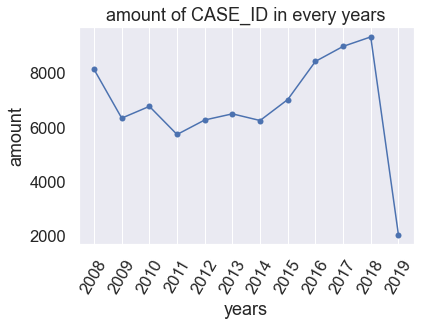

In [304]:
plt.ion()

plt.plot(X_date_count,'-o');
plt.xticks(rotation=60);
plt.title('amount of CASE_ID in every years');
plt.xlabel('years');
plt.ylabel('amount');
plt.grid(axis='y');
## 均勻挑
## 不需要考慮時間

# 變數重要性

(81830, 154)

In [ ]:
FS_IV

In [306]:

categorical_columns = list(set(X_M.columns.to_list()) & set(col_object))

numerical_columns =  list(set(X_M.columns.to_list()) & set(col_numeric))


In [307]:
## 將中文轉換為數值標記

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

cat_mappoing = dict()

for i in categorical_columns:
    
    if is_numeric_dtype(X_M[i]):
        continue
    elif is_string_dtype(X_M[i]):
        if sum(X_M[i].str.isnumeric()) > 1:
            continue
        else:
            pass
    else:
        pass
        
    
    label = LabelEncoder()
    X_M.loc[:,i] = label.fit_transform(X_M.loc[:,i])
    le_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
    cat_mappoing.update({i:le_name_mapping})

cat_mappoing

{'CASEBASE5_ATTRIBNAME': {'公營事業': 0, '服務業': 1, '製造業': 2, '金融業': 3},
 'CASEBASE1_CORGTYPE': {'公營企業': 0,
  '公開發行': 1,
  '創櫃股票': 2,
  '合作社': 3,
  '合夥': 4,
  '外國公司在台之分公司': 5,
  '外資企業': 6,
  '外資合作': 7,
  '家屬企業': 8,
  '有大陸投資人': 9,
  '獨資': 10,
  '社團法人': 11,
  '股票上市': 12,
  '股票上櫃': 13,
  '興櫃股票': 14,
  '財團法人': 15,
  '農企業機構': 16,
  '農民團體': 17,
  '醫療院所': 18,
  '非家屬企業': 19},
 'CASEBASE2_REFUND2': {'N': 0, 'Y': 1},
 'CASEBASE2_BILL1': {'N': 0, 'S': 1, 'T': 2, 'Y': 3},
 'CASEBASE2_BILL3': {'N': 0, 'Y': 1},
 'CASEBASE2_COMPTYPE': {'N': 0, 'Y': 1},
 'CASEBASE3_FINCHK': {'N': 0, 'Y': 1},
 'CASEBASE_CBUSKIND': {'服務業': 0, '製造業': 1, '金融業': 2},
 'CASEBASE2_PROCREDIT': {'N': 0, 'Y': 1},
 'CASEBASE2_REFUND0': {'N': 0, 'Y': 1},
 'CASEBASE2_MAXCREDIT': {'N': 0, 'Y': 1},
 'CASEBASE5_ATTRIBUTE': {'B': 0, 'G': 1, 'M': 2, 'N': 3},
 'CASEBASE2_TAXTYPE': {'N': 0, 'Y': 1},
 'CASEBASE2_REFUND1': {'N': 0, 'Y': 1},
 'CASEBASE2_BILL2': {'N': 0, 'S': 1, 'Y': 2},
 'CASEBASE2_REFUND3': {'N': 0, 'Y': 1},
 'CASEBASE_RANK': {'

In [308]:
cat_list = {i:list(X_M[i].unique()) for i in categorical_columns}

In [309]:
# from sklearn.preprocessing import StandardScaler






## IV 規則
FS_IV, FS_IV_Table = FeaturesSelection_IV(X_M, y_M)
# FileName = 'FeaturesSelection_IV.csv'
# FS_IV_Table.to_csv(FileName, index = False)
FS_IV

,index,IV
127,CASEBASE5_TOPNOWNETWRT,2.686431e-13
140,CASEFINANCIAL_11_FINDATE1,2.659484e-13
137,CASEFINANCIAL_10_FINDATE1,1.898177e-13
134,CASEBASE_EMPLNUM,1.569249e-13
143,CASEFINANCIAL_1_FINDATE1,1.487720e-13
132,CASEBASE_CCOMPTYPE,1.414647e-13
125,CASEBASE5_TOPNOWASST,1.104522e-13
34,CASEBASE2_EPLIST,8.474741e-14
130,CASEBASE_BUSTYPE_4,6.122330e-14
1,CASEBASE1_CAPTIAL,5.337380e-14


# 開始跑模型

In [310]:
from Eric_utilites.Eric_Machinelearning import *

%run Eric_utilites/Eric_Machinelearning



In [311]:
### 這裡要 function 化 ###
# idx_train = X_M.index.get_level_values('CASE_ID').str[0:2] < test_year
# idx_test = X_M.index.get_level_values('CASE_ID').str[0:2] >= test_year



In [319]:
## ML 變數區
Model_summary = pd.DataFrame()
test_size = 0.2
col_stratify = ['CASE_Y','CASE_M']

metric = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
kfold = 10

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X_M, 
                                                    y_M, 
                                                    test_size=test_size, 
                                                    random_state=42, 
                                                    stratify=X_M[col_stratify])






len(X_M)
len(X_train)
len(X_test)
X_train.shape

81830

65464

16366

(65464, 152)

In [321]:
def f_PrePro(lr, categorical_columns, numerical_columns, cat_list,degree=1):
    from sklearn.impute import SimpleImputer
    from sklearn.inspection import permutation_importance
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
    
    from sklearn.preprocessing import PolynomialFeatures
    
    categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    
    ('onehot', OneHotEncoder(categories = cat_list,handle_unknown='ignore',sparse=False))
    ])
    
    numerical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('standardize',StandardScaler())
    ])

    preprocessing = ColumnTransformer(
        [('cat', categorical_pipe,categorical_columns),
         ('num', numerical_pipe,numerical_columns)])

    clf = Pipeline([
        ('preprocess', preprocessing),
        ('poly',PolynomialFeatures(degree=degree,include_bias=False)),
        ('DecisionTreeRegressor', lr)
    ])
    return clf


def display_scores(scores):
    print("\nScores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(),'\n')

In [322]:
## 按照時間均勻挑
## 產業別均勻挑
## 考慮可以「分層抽樣」的變數
## 根據真正有拿來建模的 DATA 的比例進行抽樣 train and test (hands-on chapter 2)



,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,9.166664,1.479970,0.033359,0.026906,0.966660
std,0.355811,0.051840,0.003336,0.001189,0.002860
min,8.915068,1.443313,0.031000,0.026066,0.964638
25%,9.040866,1.461641,0.032180,0.026486,0.965649
50%,9.166664,1.479970,0.033359,0.026906,0.966660
75%,9.292463,1.498298,0.034538,0.027327,0.967672
max,9.418261,1.516626,0.035718,0.027747,0.968683


DecisionTreeRegressor_1
MSE train: 0.015, test: 0.023
MAE train: 0.016, test: 0.020
R^2 train: 0.985, test: 0.977


,Model,CV_MSE_mean,CV_MSE_std,CV_MAE_mean,CV_MAE_std,CV_r2_mean,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,DecisionTreeRegressor_1,0.033359,0.003336,0.026906,0.001189,0.96666,0.00286,0.015249,0.023392,0.015781,0.020141,0.984751,0.976632


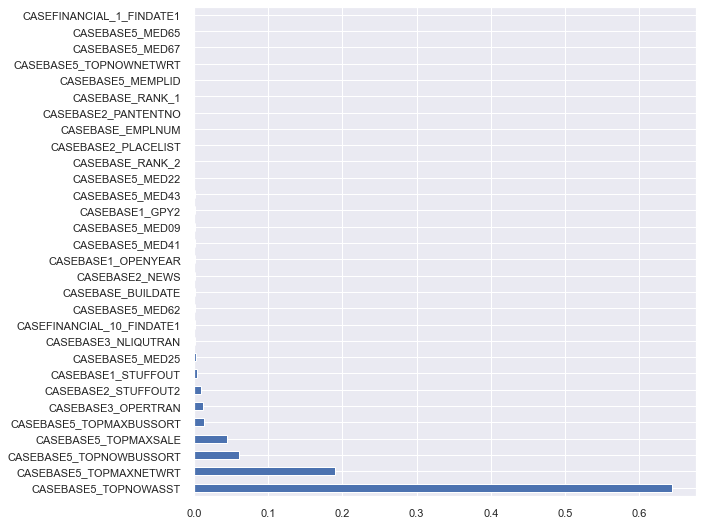

1

In [323]:
## DecisionTreeRegressor 決策樹回歸

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# col_y = ['Y_OPERATE1','CASEBASE1_GPY1']
# X = Data_final.drop(columns = col_y)
# y = Data_final[col_y[0]]

%run Eric_utilites/Eric_Machinelearning



dtr = f_PrePro(DecisionTreeRegressor(max_depth=40,min_samples_leaf=10 ),
               categorical_columns, 
               numerical_columns,
               list(cat_list.values()),
               1)

metric_dtr , dtr = f_ModelOutCome_agg('DecisionTreeRegressor_1', dtr, X_train, y_train, X_test, y_test, kfold, metric)

f_PlotFS(dtr, numerical_columns, categorical_columns)


Model_summary = Model_summary.append(metric_dtr)



In [262]:
## 線性迴歸分析
from sklearn.linear_model import LinearRegression

%run Eric_utilites/Eric_Machinelearning


lr = f_PrePro(LinearRegression(),
               categorical_columns, 
               numerical_columns,
               list(cat_list.values()),
               1)


metric_lr , lr = f_ModelOutCome_agg('LinearRegression_1', lr, X_train, y_train, X_test, y_test, kfold, metric)

# f_PlotFS(lr, numerical_columns, categorical_columns)


Model_summary = Model_summary.append(metric_lr)


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,46.047553,0.226697,3955.490685,0.593436,-3919.750591
std,1.626869,0.063951,12377.767716,0.836826,12268.575281
min,42.989788,0.131044,0.219629,0.292650,-38835.167162
25%,45.606328,0.172763,0.248170,0.297851,0.735740
50%,46.286099,0.236727,0.253653,0.305196,0.749660
75%,47.225393,0.258968,0.267305,0.307971,0.755463
max,48.158175,0.320536,39181.672186,2.963703,0.768246


LinearRegression_1
MSE train: 0.233, test: 0.519
MAE train: 0.297, test: 0.311
R^2 train: 0.767, test: 0.504


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,LinearRegression_1,3955.490685,0.253653,12377.767716,0.593436,0.305196,0.836826,-3919.750591,0.74966,12268.575281,0.232805,0.518589,0.296638,0.311282,0.767191,0.504338


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,73.314322,0.367716,0.053427,0.094943,0.946556
std,11.847206,0.197963,0.004966,0.002407,0.004847
min,39.631305,0.193223,0.046408,0.090853,0.938510
25%,76.759559,0.270159,0.048968,0.093386,0.943837
50%,77.071936,0.287065,0.054942,0.095996,0.946520
75%,77.452607,0.433915,0.057512,0.096429,0.950183
max,77.634527,0.862143,0.060152,0.098197,0.954375


ExtraTreesRegressor_1
MSE train: 0.031, test: 0.056
MAE train: 0.070, test: 0.096
R^2 train: 0.969, test: 0.946


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,ExtraTreesRegressor_1,0.053427,0.054942,0.004966,0.094943,0.095996,0.002407,0.946556,0.94652,0.004847,0.031364,0.056079,0.069757,0.096333,0.968635,0.9464


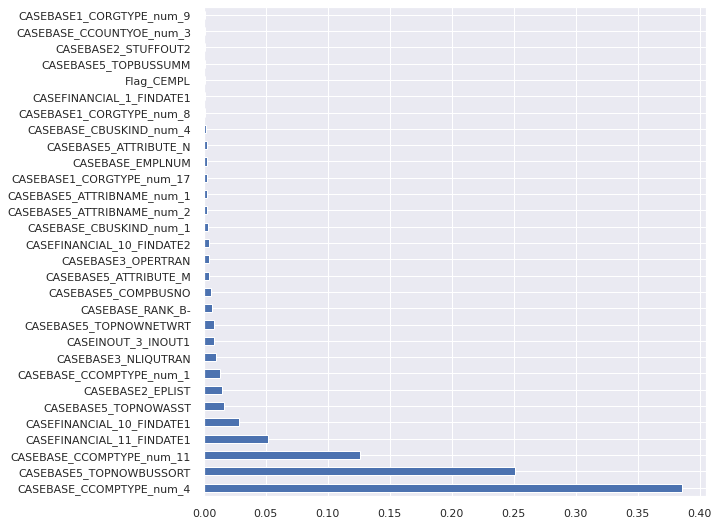

1

In [263]:
## 極限樹
from sklearn.ensemble import ExtraTreesRegressor 


for i in range(1,2):
    etr = f_PrePro(ExtraTreesRegressor(n_estimators = 10,max_depth = 40,min_samples_leaf =10,random_state=42,n_jobs=-1),
                   categorical_columns, 
                   numerical_columns,
                   list(cat_list.values()),
                   i)
    metric_etr , etr = f_ModelOutCome_agg('ExtraTreesRegressor_' + str(i), etr, X_train, y_train, X_test, y_test, kfold, metric)

    f_PlotFS(etr, numerical_columns, categorical_columns)


    Model_summary = Model_summary.append(metric_etr)
    

,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,49.608253,0.276833,0.052239,0.085470,0.947722
std,6.265414,0.063836,0.005033,0.002551,0.005165
min,31.798873,0.167260,0.044695,0.081259,0.941007
25%,51.272372,0.243180,0.048814,0.083507,0.943467
50%,51.523116,0.276637,0.052934,0.085759,0.946939
75%,51.829419,0.320393,0.056325,0.087268,0.951675
max,52.053897,0.368921,0.058293,0.089029,0.955518


RandomForestRegressor_1
MSE train: 0.031, test: 0.051
MAE train: 0.064, test: 0.084
R^2 train: 0.969, test: 0.952


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,RandomForestRegressor_1,0.052239,0.052934,0.005033,0.08547,0.085759,0.002551,0.947722,0.946939,0.005165,0.031468,0.050574,0.063511,0.083701,0.968532,0.951662


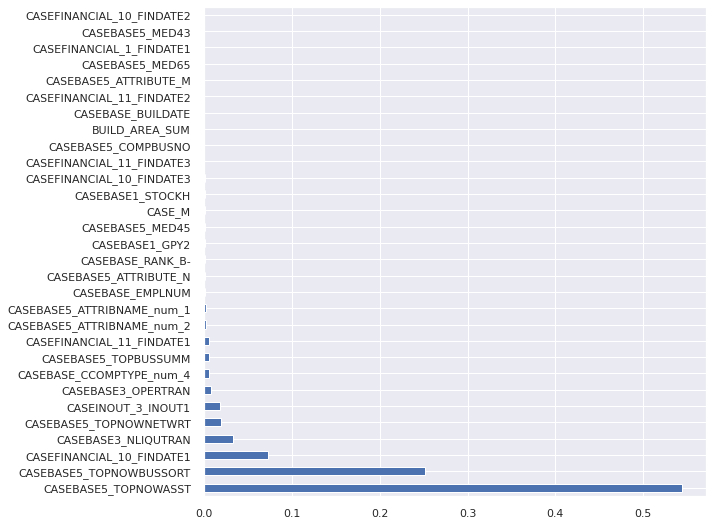

1

In [264]:
# 隨機森林

from sklearn.ensemble import RandomForestRegressor 


for i in range(1,2):
    rfr = f_PrePro(RandomForestRegressor(n_estimators = 10, max_depth = 40,min_samples_leaf =10,random_state=42,n_jobs=-1),
                   categorical_columns, 
                   numerical_columns,
                   list(cat_list.values()),
                   i)
    
    metric_rfr, rfr = f_ModelOutCome_agg('RandomForestRegressor_' + str(i), rfr, X_train, y_train, X_test, y_test, kfold, metric)

    f_PlotFS(rfr, numerical_columns, categorical_columns)


    Model_summary = Model_summary.append(metric_rfr)


In [316]:
## LinearSVR

from sklearn.svm import SVR

for ker_i in ['linear']: #, 'poly', 'rbf', 'sigmoid', 'precomputed']:

    svr = SVR(kernel=ker_i, degree=2, C=100, epsilon=0.1)
    
    
    svr = f_PrePro(svr,
                   categorical_columns, 
                   numerical_columns,
                   list(cat_list.values()))
    
    
    metric_svr, svr = f_ModelOutCome_agg('SVR_' + ker_i, svr, X_train, y_train, X_test, y_test, kfold, metric)

    #f_PlotFS(svr, numerical_columns, categorical_columns)


    Model_summary = Model_summary.append(metric_svr)



KeyboardInterrupt: 

In [ ]:
Model_summary

# Feature Selection

In [269]:
## 考慮重要參數
n = 10## 選取 IV method 前一百個變數
col_feature1 = FS_IV['index'][:n].to_list()

for i in range(1,3):
    categorical_columns_fs = list(set(categorical_columns) & set(col_feature1))
    numerical_columns_fs = list(set(numerical_columns) & set(col_feature1))
    
    cat_list_FS = [ cat_list[i] for i in categorical_columns_fs]
    
    X_train_FS = X_train[col_feature1]
    X_test_FS = X_test[col_feature1]
    
    ## linear 
    lr_fs = f_PrePro(LinearRegression(),
                   categorical_columns_fs, 
                   numerical_columns_fs,
                   cat_list_FS,
                   i)
    
    metric_lr_fs, lr_fs = f_ModelOutCome_agg('LinearRegression_FS_' + str(i), lr_fs, X_train_FS, y_train, X_test_FS, y_test, kfold, metric)
    Model_summary = Model_summary.append(metric_lr_fs)
    
    
    ## decision tree
    dtr_fs = f_PrePro(DecisionTreeRegressor(max_depth=40,min_samples_leaf=10 ),
                   categorical_columns_fs, 
                   categorical_columns_fs,
                   cat_list_FS,
                   i)
    
    metric_dtr_fs, dtr_fs = f_ModelOutCome_agg('DecisionTreeRegressor_FS_' + str(i), dtr_fs, X_train_FS, y_train, X_test_FS, y_test, kfold, metric)
    Model_summary = Model_summary.append(metric_dtr_fs)
    
    
    ## extra tree
    etr_fs = f_PrePro(ExtraTreesRegressor(n_estimators = 10, max_depth = 40,min_samples_leaf =10,random_state=42, n_jobs = -1),
                   categorical_columns_fs, 
                   numerical_columns_fs,
                   cat_list_FS,
                   i)
    
    metric_etr_fs, etr_fs = f_ModelOutCome_agg('ExtraTreeRegressor_FS_' + str(i), etr_fs, X_train_FS, y_train, X_test_FS, y_test, kfold, metric)
    Model_summary = Model_summary.append(metric_etr_fs)

    

,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01
mean,0.539200,0.204568,9.167276e+18,1.492022e+07,-9.450710e+18
std,0.121453,0.082291,2.898947e+19,4.718187e+07,2.988577e+19
min,0.352350,0.107056,3.133776e-01,3.402294e-01,-9.450710e+19
25%,0.480681,0.151096,3.367729e-01,3.459739e-01,6.442602e-01
50%,0.507734,0.194189,3.480335e-01,3.482092e-01,6.551355e-01
75%,0.608936,0.236607,3.603044e-01,3.518813e-01,6.647765e-01
max,0.739728,0.373173,9.167276e+19,1.492022e+08,6.713512e-01


LinearRegression_1
MSE train: 0.337, test: 0.346
MAE train: 0.346, test: 0.349
R^2 train: 0.663, test: 0.669


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,LinearRegression_1,9.167276e+18,0.348034,2.898947e+19,1.492022e+07,0.348209,4.718187e+07,-9.450710e+18,0.655135,2.988577e+19,0.337273,0.346334,0.346171,0.349314,0.662721,0.668977


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.164014,0.167228,0.434713,0.384695,0.565316
std,0.011704,0.017244,0.022426,0.007813,0.015841
min,0.150398,0.131330,0.398701,0.371025,0.541465
25%,0.154481,0.158609,0.429789,0.383417,0.556778
50%,0.161173,0.172606,0.436484,0.385836,0.566044
75%,0.171816,0.179451,0.442585,0.388002,0.577374
max,0.183442,0.183018,0.470037,0.396252,0.588972


DecisionTreeRegressor_1
MSE train: 0.434, test: 0.449
MAE train: 0.384, test: 0.391
R^2 train: 0.566, test: 0.571


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,DecisionTreeRegressor_1,0.434713,0.436484,0.022426,0.384695,0.385836,0.007813,0.565316,0.566044,0.015841,0.433642,0.448848,0.38433,0.390741,0.56635,0.570996


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.127646,0.233979,0.088000,0.138052,0.911967
std,0.687134,0.089092,0.007404,0.004142,0.007283
min,1.307910,0.123730,0.076842,0.130712,0.899897
25%,3.063453,0.156249,0.083394,0.136555,0.907836
50%,3.313248,0.236059,0.088241,0.138495,0.913085
75%,3.495764,0.286425,0.094119,0.140560,0.915275
max,3.688640,0.378302,0.097925,0.143142,0.922274


ExtraTreeRegressor_1
MSE train: 0.067, test: 0.088
MAE train: 0.119, test: 0.138
R^2 train: 0.933, test: 0.916


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,ExtraTreeRegressor_1,0.088,0.088241,0.007404,0.138052,0.138495,0.004142,0.911967,0.913085,0.007283,0.067251,0.088062,0.119486,0.137911,0.932748,0.915831


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,29.239808,0.317916,0.395737,0.242408,0.606713
std,8.927016,0.143239,0.528621,0.007702,0.518432
min,5.441042,0.150364,0.202755,0.231925,-0.866082
25%,28.983840,0.219010,0.208828,0.237040,0.755772
50%,32.516912,0.281624,0.224559,0.242320,0.778792
75%,33.370646,0.412382,0.254190,0.245078,0.785727
max,35.853145,0.536549,1.898091,0.259406,0.798282


LinearRegression_2
MSE train: 0.203, test: 0.214
MAE train: 0.237, test: 0.243
R^2 train: 0.797, test: 0.796


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,LinearRegression_2,0.395737,0.224559,0.528621,0.242408,0.24232,0.007702,0.606713,0.778792,0.518432,0.203452,0.213594,0.237427,0.242699,0.796545,0.795849


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.346934,0.133966,0.434406,0.384545,0.565619
std,0.055431,0.031305,0.022295,0.007779,0.015808
min,0.299349,0.107873,0.398429,0.370973,0.542680
25%,0.314355,0.111763,0.428785,0.383217,0.556838
50%,0.329638,0.120450,0.436466,0.385786,0.566057
75%,0.368157,0.140040,0.442534,0.387947,0.578357
max,0.482569,0.191424,0.468792,0.395776,0.589252


DecisionTreeRegressor_2
MSE train: 0.433, test: 0.447
MAE train: 0.384, test: 0.390
R^2 train: 0.567, test: 0.572


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,DecisionTreeRegressor_2,0.434406,0.436466,0.022295,0.384545,0.385786,0.007779,0.565619,0.566057,0.015808,0.433316,0.447372,0.38416,0.390313,0.566676,0.572407


,fit_time,score_time,mean_squared_error,mean_absolute_error,r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,28.509351,0.561619,0.077369,0.126701,0.922604
std,5.806466,0.120865,0.006365,0.003491,0.006238
min,12.399801,0.378581,0.068849,0.121712,0.912168
25%,29.399209,0.499407,0.071779,0.123656,0.920060
50%,30.198197,0.538725,0.077150,0.128000,0.924415
75%,30.681048,0.609122,0.081708,0.128828,0.926303
max,32.552594,0.757616,0.086514,0.132025,0.929887


ExtraTreeRegressor_2
MSE train: 0.048, test: 0.077
MAE train: 0.098, test: 0.125
R^2 train: 0.952, test: 0.927


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,ExtraTreeRegressor_2,0.077369,0.07715,0.006365,0.126701,0.128,0.003491,0.922604,0.924415,0.006238,0.048298,0.076744,0.098139,0.125452,0.951702,0.926649


In [270]:
Model_summary


,Model,CV_MSE_mean,CV_MSE_50%,CV_MSE_std,CV_MAE_mean,CV_MAE_50%,CV_MAE_std,CV_r2_mean,CV_r2_50%,CV_r2_std,MSE_train,MSE_test,MAE_train,MAE_test,R_square_train,R_square_test
0,DecisionTreeRegressor_1,6.786306e-02,0.068522,5.691972e-03,1.031577e-01,0.103808,2.862145e-03,9.320444e-01,0.932271,6.384525e-03,0.030686,0.062072,0.066962,0.098585,0.969314,0.940673
0,LinearRegression_1,3.955491e+03,0.253653,1.237777e+04,5.934356e-01,0.305196,8.368263e-01,-3.919751e+03,0.749660,1.226858e+04,0.232805,0.518589,0.296638,0.311282,0.767191,0.504338
0,ExtraTreesRegressor_1,5.342717e-02,0.054942,4.965996e-03,9.494253e-02,0.095996,2.406786e-03,9.465555e-01,0.946520,4.847298e-03,0.031364,0.056079,0.069757,0.096333,0.968635,0.946400
0,RandomForestRegressor_1,5.223913e-02,0.052934,5.032840e-03,8.546987e-02,0.085759,2.551013e-03,9.477220e-01,0.946939,5.164839e-03,0.031468,0.050574,0.063511,0.083701,0.968532,0.951662
0,LinearRegression_1,9.167276e+18,0.348034,2.898947e+19,1.492022e+07,0.348209,4.718187e+07,-9.450710e+18,0.655135,2.988577e+19,0.337273,0.346334,0.346171,0.349314,0.662721,0.668977
0,DecisionTreeRegressor_1,4.347133e-01,0.436484,2.242584e-02,3.846950e-01,0.385836,7.813216e-03,5.653157e-01,0.566044,1.584059e-02,0.433642,0.448848,0.384330,0.390741,0.566350,0.570996
0,ExtraTreeRegressor_1,8.799997e-02,0.088241,7.403707e-03,1.380517e-01,0.138495,4.141878e-03,9.119673e-01,0.913085,7.283399e-03,0.067251,0.088062,0.119486,0.137911,0.932748,0.915831
0,LinearRegression_2,3.957373e-01,0.224559,5.286215e-01,2.424079e-01,0.242320,7.702119e-03,6.067134e-01,0.778792,5.184319e-01,0.203452,0.213594,0.237427,0.242699,0.796545,0.795849
0,DecisionTreeRegressor_2,4.344058e-01,0.436466,2.229458e-02,3.845450e-01,0.385786,7.779150e-03,5.656187e-01,0.566057,1.580794e-02,0.433316,0.447372,0.384160,0.390313,0.566676,0.572407
0,ExtraTreeRegressor_2,7.736905e-02,0.077150,6.364928e-03,1.267011e-01,0.128000,3.490825e-03,9.226044e-01,0.924415,6.238330e-03,0.048298,0.076744,0.098139,0.125452,0.951702,0.926649


In [72]:
# ### 對 y 進行轉換
# # 線性迴歸分析


# from sklearn.linear_model import LinearRegression
# from sklearn.compose import TransformedTargetRegressor
# from sklearn.preprocessing import StandardScaler



# func = lambda x: np.log(abs(x+1)) * np.sign(x)
# inverse_func = lambda x : (np.exp(abs(x)) - 1) * np.sign(x)

# reg = TransformedTargetRegressor(regressor=LinearRegression(),
#                                  transformer= StandardScaler())
#                                  #func=func, inverse_func=inverse_func)

# lr = f_PrePro(reg,
#                categorical_columns, 
#                numerical_columns)

# ## Cross_val_score
# lin_scores = cross_val_score(lr, X_train, y_train,
#                              scoring="neg_mean_squared_error", cv=10)
# lin_rmse_scores = np.sqrt(-lin_scores)
# display_scores(lin_rmse_scores)

# lr = f_ModelOutcome(lr, X_train, y_train, X_test, y_test)


SVR linear


,fit_time,score_time,mean_squared_error,mean_absolute_error,test_r2
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.190450,0.056534,0.434387,0.384543,0.565637
std,0.004727,0.007437,0.022305,0.007787,0.015831
min,0.182132,0.045385,0.398428,0.370973,0.542666
25%,0.188727,0.050835,0.428633,0.383178,0.556838
50%,0.189831,0.055704,0.436469,0.385787,0.566054
75%,0.194325,0.061972,0.442534,0.387947,0.578507
max,0.196898,0.068118,0.468806,0.395812,0.589253


In [ ]:
Model_summary.to_csv('with_all.csv')

In [70]:
# # Importing module and initializing setup
# from pycaret.regression import *

# clf1 = setup(data = Data_M, 
#              target = 'Y_OPERATE1',
#              normalize = True,
#              normalize_method='zscore',
#              feature_selection= True,
#              ignore_features = ['CASEBASE1_GPY1'],
#              categorical_features =['CASEBASE_BUSTYPE_4'] + [  i + '_num'for i in col_mapping.keys()],
#              numeric_features = [],
#              n_jobs=-1)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,3620
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(127747, 102)"
4,Missing Values,True
5,Numeric Features,64
6,Categorical Features,37
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [71]:
# best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,1871368.8927,225488321028611.3438,14429907.5449,0.9864,1.4375,6.1230,48.2562
1,CatBoost Regressor,2123738.7441,309072901896609.7500,15470326.1428,0.9807,1.6553,14.3230,41.5693
2,Extra Trees Regressor,1314825.4137,314630227579206.3750,15027873.2845,0.9792,0.9546,7.0556,4.2072
3,Random Forest,1775300.5379,495014995360431.8125,20980401.3944,0.9698,0.9296,12.5233,4.0270
4,Light Gradient Boosting Machine,2716270.4506,552478189028197.5625,22496032.3728,0.9680,1.5520,7.3680,2.0094
5,K Neighbors Regressor,2781538.3792,615678127875928.7500,23993002.9556,0.9674,1.2446,6.8961,4.1040
6,Gradient Boosting Regressor,4349520.2521,533920909811178.1875,21388937.0382,0.9646,2.1977,29.7916,33.6718
7,Decision Tree,1976295.3508,986608806327237.0000,27827396.1061,0.9324,0.8737,8.6944,3.1581
8,Lasso Least Angle Regression,19665264.5318,3444322411141877.0000,57849200.6469,0.8140,3.4247,179.3693,0.3090
9,Lasso Regression,20617184.0199,3478010695279940.5000,58061095.1846,0.8131,3.5340,246.3432,9.9695
